The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload

 Start of the Network 2 
The number of parameters of the network is  8862
Epoch [2/25],Step [1/64],Loss: 16.0171, Acc_digits: 10/128 (8%) ,Acc_labels: 27/64 (42%)
Epoch [2/25],Step [2/64],Loss: 7.6165, Acc_digits: 12/128 (9%) ,Acc_labels: 37/64 (58%)
Epoch [2/25],Step [3/64],Loss: 3.8902, Acc_digits: 13/128 (10%) ,Acc_labels: 36/64 (56%)
Epoch [2/25],Step [4/64],Loss: 3.1956, Acc_digits: 17/128 (13%) ,Acc_labels: 29/64 (45%)
Epoch [2/25],Step [5/64],Loss: 3.1694, Acc_digits: 11/128 (9%) ,Acc_labels: 39/64 (61%)
Epoch [2/25],Step [6/64],Loss: 3.0226, Acc_digits: 20/128 (16%) ,Acc_labels: 33/64 (52%)
Epoch [2/25],Step [7/64],Loss: 2.9954, Acc_digits: 16/128 (12%) ,Acc_labels: 30/64 (47%)
Epoch [2/25],Step [8/64],Loss: 3.0332, Acc_digits: 17/128 (13%) ,Acc_labels: 39/64 (61%)
Epoch [2/25],Step [9/64],Loss: 3.0150, Acc_digits: 14/128 (11%) ,Acc_labels: 33/64 (52%)
Epoch [2/25],Step [10/64],Loss: 2.9748

Epoch [7/25],Step [5/64],Loss: 2.6598, Acc_digits: 40/128 (31%) ,Acc_labels: 30/64 (47%)
Epoch [7/25],Step [6/64],Loss: 2.6474, Acc_digits: 44/128 (34%) ,Acc_labels: 33/64 (52%)
Epoch [7/25],Step [7/64],Loss: 2.5786, Acc_digits: 41/128 (32%) ,Acc_labels: 41/64 (64%)
Epoch [7/25],Step [8/64],Loss: 2.6646, Acc_digits: 38/128 (30%) ,Acc_labels: 36/64 (56%)
Epoch [7/25],Step [9/64],Loss: 2.6152, Acc_digits: 38/128 (30%) ,Acc_labels: 32/64 (50%)
Epoch [7/25],Step [10/64],Loss: 2.7168, Acc_digits: 35/128 (27%) ,Acc_labels: 33/64 (52%)
Epoch [7/25],Step [11/64],Loss: 2.5006, Acc_digits: 48/128 (38%) ,Acc_labels: 36/64 (56%)
Epoch [7/25],Step [12/64],Loss: 2.5139, Acc_digits: 45/128 (35%) ,Acc_labels: 47/64 (73%)
Epoch [7/25],Step [13/64],Loss: 2.6488, Acc_digits: 38/128 (30%) ,Acc_labels: 33/64 (52%)
Epoch [7/25],Step [14/64],Loss: 2.5878, Acc_digits: 45/128 (35%) ,Acc_labels: 39/64 (61%)
Epoch [7/25],Step [15/64],Loss: 2.4785, Acc_digits: 46/128 (36%) ,Acc_labels: 44/64 (69%)
Epoch [7/25],St


Test set: Loss: 1.8918,Acc_digits: 1303/2000 (65%),Acc_labels: 657/1000 66%
Epoch [13/25],Step [1/64],Loss: 2.3798, Acc_digits: 50/128 (39%) ,Acc_labels: 36/64 (56%)
Epoch [13/25],Step [2/64],Loss: 2.3555, Acc_digits: 48/128 (38%) ,Acc_labels: 44/64 (69%)
Epoch [13/25],Step [3/64],Loss: 2.3749, Acc_digits: 49/128 (38%) ,Acc_labels: 44/64 (69%)
Epoch [13/25],Step [4/64],Loss: 2.2701, Acc_digits: 54/128 (42%) ,Acc_labels: 39/64 (61%)
Epoch [13/25],Step [5/64],Loss: 2.4479, Acc_digits: 46/128 (36%) ,Acc_labels: 39/64 (61%)
Epoch [13/25],Step [6/64],Loss: 2.3777, Acc_digits: 50/128 (39%) ,Acc_labels: 43/64 (67%)
Epoch [13/25],Step [7/64],Loss: 2.2476, Acc_digits: 55/128 (43%) ,Acc_labels: 42/64 (66%)
Epoch [13/25],Step [8/64],Loss: 2.2930, Acc_digits: 49/128 (38%) ,Acc_labels: 40/64 (62%)
Epoch [13/25],Step [9/64],Loss: 2.4397, Acc_digits: 41/128 (32%) ,Acc_labels: 36/64 (56%)
Epoch [13/25],Step [10/64],Loss: 2.2923, Acc_digits: 50/128 (39%) ,Acc_labels: 38/64 (59%)
Epoch [13/25],Step [11


Test set: Loss: 1.5662,Acc_digits: 1493/2000 (75%),Acc_labels: 692/1000 69%
Epoch [19/25],Step [1/64],Loss: 1.9785, Acc_digits: 60/128 (47%) ,Acc_labels: 41/64 (64%)
Epoch [19/25],Step [2/64],Loss: 2.0319, Acc_digits: 63/128 (49%) ,Acc_labels: 45/64 (70%)
Epoch [19/25],Step [3/64],Loss: 1.9979, Acc_digits: 60/128 (47%) ,Acc_labels: 46/64 (72%)
Epoch [19/25],Step [4/64],Loss: 1.9976, Acc_digits: 68/128 (53%) ,Acc_labels: 39/64 (61%)
Epoch [19/25],Step [5/64],Loss: 1.9650, Acc_digits: 62/128 (48%) ,Acc_labels: 44/64 (69%)
Epoch [19/25],Step [6/64],Loss: 1.9988, Acc_digits: 69/128 (54%) ,Acc_labels: 43/64 (67%)
Epoch [19/25],Step [7/64],Loss: 1.9021, Acc_digits: 60/128 (47%) ,Acc_labels: 51/64 (80%)
Epoch [19/25],Step [8/64],Loss: 2.1068, Acc_digits: 58/128 (45%) ,Acc_labels: 36/64 (56%)
Epoch [19/25],Step [9/64],Loss: 1.9065, Acc_digits: 60/128 (47%) ,Acc_labels: 51/64 (80%)
Epoch [19/25],Step [10/64],Loss: 2.2053, Acc_digits: 57/128 (45%) ,Acc_labels: 42/64 (66%)
Epoch [19/25],Step [11


Test set: Loss: 1.2605,Acc_digits: 1561/2000 (78%),Acc_labels: 736/1000 74%
Epoch [25/25],Step [1/64],Loss: 1.8164, Acc_digits: 77/128 (60%) ,Acc_labels: 44/64 (69%)
Epoch [25/25],Step [2/64],Loss: 2.0353, Acc_digits: 71/128 (55%) ,Acc_labels: 42/64 (66%)
Epoch [25/25],Step [3/64],Loss: 1.8768, Acc_digits: 72/128 (56%) ,Acc_labels: 42/64 (66%)
Epoch [25/25],Step [4/64],Loss: 1.8918, Acc_digits: 75/128 (59%) ,Acc_labels: 41/64 (64%)
Epoch [25/25],Step [5/64],Loss: 1.7679, Acc_digits: 70/128 (55%) ,Acc_labels: 50/64 (78%)
Epoch [25/25],Step [6/64],Loss: 1.8755, Acc_digits: 64/128 (50%) ,Acc_labels: 42/64 (66%)
Epoch [25/25],Step [7/64],Loss: 1.8044, Acc_digits: 73/128 (57%) ,Acc_labels: 45/64 (70%)
Epoch [25/25],Step [8/64],Loss: 1.8199, Acc_digits: 67/128 (52%) ,Acc_labels: 44/64 (69%)
Epoch [25/25],Step [9/64],Loss: 1.8027, Acc_digits: 70/128 (55%) ,Acc_labels: 55/64 (86%)
Epoch [25/25],Step [10/64],Loss: 1.8437, Acc_digits: 72/128 (56%) ,Acc_labels: 45/64 (70%)
Epoch [25/25],Step [11


Test set: Loss: 1.0921,Acc_digits: 1640/2000 (82%),Acc_labels: 766/1000 77%
Epoch [6/25],Step [1/64],Loss: 1.7243, Acc_digits: 78/128 (61%) ,Acc_labels: 45/64 (70%)
Epoch [6/25],Step [2/64],Loss: 1.6642, Acc_digits: 73/128 (57%) ,Acc_labels: 47/64 (73%)
Epoch [6/25],Step [3/64],Loss: 1.6463, Acc_digits: 76/128 (59%) ,Acc_labels: 51/64 (80%)
Epoch [6/25],Step [4/64],Loss: 1.6733, Acc_digits: 80/128 (62%) ,Acc_labels: 44/64 (69%)
Epoch [6/25],Step [5/64],Loss: 1.7233, Acc_digits: 75/128 (59%) ,Acc_labels: 46/64 (72%)
Epoch [6/25],Step [6/64],Loss: 1.6802, Acc_digits: 78/128 (61%) ,Acc_labels: 45/64 (70%)
Epoch [6/25],Step [7/64],Loss: 1.8098, Acc_digits: 74/128 (58%) ,Acc_labels: 44/64 (69%)
Epoch [6/25],Step [8/64],Loss: 1.4419, Acc_digits: 81/128 (63%) ,Acc_labels: 50/64 (78%)
Epoch [6/25],Step [9/64],Loss: 1.5471, Acc_digits: 82/128 (64%) ,Acc_labels: 52/64 (81%)
Epoch [6/25],Step [10/64],Loss: 1.6748, Acc_digits: 75/128 (59%) ,Acc_labels: 49/64 (77%)
Epoch [6/25],Step [11/64],Loss: 


Test set: Loss: 1.0050,Acc_digits: 1705/2000 (85%),Acc_labels: 794/1000 79%
Epoch [12/25],Step [1/64],Loss: 1.5874, Acc_digits: 86/128 (67%) ,Acc_labels: 51/64 (80%)
Epoch [12/25],Step [2/64],Loss: 1.4968, Acc_digits: 88/128 (69%) ,Acc_labels: 49/64 (77%)
Epoch [12/25],Step [3/64],Loss: 1.4755, Acc_digits: 88/128 (69%) ,Acc_labels: 50/64 (78%)
Epoch [12/25],Step [4/64],Loss: 1.5216, Acc_digits: 86/128 (67%) ,Acc_labels: 44/64 (69%)
Epoch [12/25],Step [5/64],Loss: 1.5040, Acc_digits: 90/128 (70%) ,Acc_labels: 51/64 (80%)
Epoch [12/25],Step [6/64],Loss: 1.6957, Acc_digits: 79/128 (62%) ,Acc_labels: 45/64 (70%)
Epoch [12/25],Step [7/64],Loss: 1.5071, Acc_digits: 86/128 (67%) ,Acc_labels: 43/64 (67%)
Epoch [12/25],Step [8/64],Loss: 1.5374, Acc_digits: 80/128 (62%) ,Acc_labels: 44/64 (69%)
Epoch [12/25],Step [9/64],Loss: 1.3007, Acc_digits: 94/128 (73%) ,Acc_labels: 56/64 (88%)
Epoch [12/25],Step [10/64],Loss: 1.6238, Acc_digits: 80/128 (62%) ,Acc_labels: 49/64 (77%)
Epoch [12/25],Step [11

Epoch [17/25],Step [14/64],Loss: 1.2240, Acc_digits: 96/128 (75%) ,Acc_labels: 52/64 (81%)
Epoch [17/25],Step [15/64],Loss: 1.3171, Acc_digits: 86/128 (67%) ,Acc_labels: 51/64 (80%)
Epoch [17/25],Step [16/40],Loss: 1.2514, Acc_digits: 57/80 (71%) ,Acc_labels: 33/40 (82%)
Time needed to train  0.2334209280088544

Test set: Loss: 0.9013,Acc_digits: 1733/2000 (87%),Acc_labels: 817/1000 82%
Epoch [18/25],Step [1/64],Loss: 1.5047, Acc_digits: 88/128 (69%) ,Acc_labels: 46/64 (72%)
Epoch [18/25],Step [2/64],Loss: 1.5029, Acc_digits: 79/128 (62%) ,Acc_labels: 51/64 (80%)
Epoch [18/25],Step [3/64],Loss: 1.4389, Acc_digits: 93/128 (73%) ,Acc_labels: 50/64 (78%)
Epoch [18/25],Step [4/64],Loss: 1.2403, Acc_digits: 101/128 (79%) ,Acc_labels: 48/64 (75%)
Epoch [18/25],Step [5/64],Loss: 1.2122, Acc_digits: 90/128 (70%) ,Acc_labels: 56/64 (88%)
Epoch [18/25],Step [6/64],Loss: 1.4160, Acc_digits: 91/128 (71%) ,Acc_labels: 51/64 (80%)
Epoch [18/25],Step [7/64],Loss: 1.4697, Acc_digits: 87/128 (68%) ,Acc

Epoch [23/25],Step [15/64],Loss: 1.2625, Acc_digits: 96/128 (75%) ,Acc_labels: 50/64 (78%)
Epoch [23/25],Step [16/40],Loss: 1.1178, Acc_digits: 61/80 (76%) ,Acc_labels: 35/40 (88%)
Time needed to train  0.2133769509382546

Test set: Loss: 0.8295,Acc_digits: 1777/2000 (89%),Acc_labels: 818/1000 82%
Epoch [24/25],Step [1/64],Loss: 1.3515, Acc_digits: 88/128 (69%) ,Acc_labels: 45/64 (70%)
Epoch [24/25],Step [2/64],Loss: 1.4552, Acc_digits: 85/128 (66%) ,Acc_labels: 53/64 (83%)
Epoch [24/25],Step [3/64],Loss: 1.3112, Acc_digits: 92/128 (72%) ,Acc_labels: 51/64 (80%)
Epoch [24/25],Step [4/64],Loss: 1.2821, Acc_digits: 93/128 (73%) ,Acc_labels: 51/64 (80%)
Epoch [24/25],Step [5/64],Loss: 1.4250, Acc_digits: 86/128 (67%) ,Acc_labels: 49/64 (77%)
Epoch [24/25],Step [6/64],Loss: 1.4032, Acc_digits: 94/128 (73%) ,Acc_labels: 49/64 (77%)
Epoch [24/25],Step [7/64],Loss: 1.5631, Acc_digits: 87/128 (68%) ,Acc_labels: 47/64 (73%)
Epoch [24/25],Step [8/64],Loss: 1.3237, Acc_digits: 90/128 (70%) ,Acc_l

Epoch [4/25],Step [15/64],Loss: 1.2283, Acc_digits: 93/128 (73%) ,Acc_labels: 51/64 (80%)
Epoch [4/25],Step [16/40],Loss: 1.1362, Acc_digits: 55/80 (69%) ,Acc_labels: 34/40 (85%)
Time needed to train  0.2214396019699052

Test set: Loss: 0.7931,Acc_digits: 1785/2000 (89%),Acc_labels: 810/1000 81%
Epoch [5/25],Step [1/64],Loss: 1.3803, Acc_digits: 95/128 (74%) ,Acc_labels: 47/64 (73%)
Epoch [5/25],Step [2/64],Loss: 1.2708, Acc_digits: 92/128 (72%) ,Acc_labels: 46/64 (72%)
Epoch [5/25],Step [3/64],Loss: 1.1775, Acc_digits: 91/128 (71%) ,Acc_labels: 55/64 (86%)
Epoch [5/25],Step [4/64],Loss: 1.3092, Acc_digits: 93/128 (73%) ,Acc_labels: 52/64 (81%)
Epoch [5/25],Step [5/64],Loss: 1.4546, Acc_digits: 91/128 (71%) ,Acc_labels: 46/64 (72%)
Epoch [5/25],Step [6/64],Loss: 1.2247, Acc_digits: 94/128 (73%) ,Acc_labels: 48/64 (75%)
Epoch [5/25],Step [7/64],Loss: 1.4769, Acc_digits: 88/128 (69%) ,Acc_labels: 50/64 (78%)
Epoch [5/25],Step [8/64],Loss: 1.2847, Acc_digits: 88/128 (69%) ,Acc_labels: 50/

Epoch [10/25],Step [14/64],Loss: 1.2686, Acc_digits: 86/128 (67%) ,Acc_labels: 48/64 (75%)
Epoch [10/25],Step [15/64],Loss: 1.0018, Acc_digits: 101/128 (79%) ,Acc_labels: 59/64 (92%)
Epoch [10/25],Step [16/40],Loss: 1.0829, Acc_digits: 64/80 (80%) ,Acc_labels: 34/40 (85%)
Time needed to train  0.23159333306830376

Test set: Loss: 0.7631,Acc_digits: 1794/2000 (90%),Acc_labels: 821/1000 82%
Epoch [11/25],Step [1/64],Loss: 1.2622, Acc_digits: 95/128 (74%) ,Acc_labels: 47/64 (73%)
Epoch [11/25],Step [2/64],Loss: 1.0995, Acc_digits: 97/128 (76%) ,Acc_labels: 51/64 (80%)
Epoch [11/25],Step [3/64],Loss: 1.2613, Acc_digits: 95/128 (74%) ,Acc_labels: 51/64 (80%)
Epoch [11/25],Step [4/64],Loss: 1.2789, Acc_digits: 97/128 (76%) ,Acc_labels: 47/64 (73%)
Epoch [11/25],Step [5/64],Loss: 1.3437, Acc_digits: 89/128 (70%) ,Acc_labels: 51/64 (80%)
Epoch [11/25],Step [6/64],Loss: 1.3392, Acc_digits: 92/128 (72%) ,Acc_labels: 48/64 (75%)
Epoch [11/25],Step [7/64],Loss: 1.2102, Acc_digits: 93/128 (73%) ,Ac

Epoch [16/25],Step [14/64],Loss: 1.1778, Acc_digits: 93/128 (73%) ,Acc_labels: 51/64 (80%)
Epoch [16/25],Step [15/64],Loss: 1.2477, Acc_digits: 95/128 (74%) ,Acc_labels: 52/64 (81%)
Epoch [16/25],Step [16/40],Loss: 1.0905, Acc_digits: 64/80 (80%) ,Acc_labels: 35/40 (88%)
Time needed to train  0.23102975101210177

Test set: Loss: 0.7203,Acc_digits: 1815/2000 (91%),Acc_labels: 822/1000 82%
Epoch [17/25],Step [1/64],Loss: 1.1505, Acc_digits: 99/128 (77%) ,Acc_labels: 49/64 (77%)
Epoch [17/25],Step [2/64],Loss: 1.1381, Acc_digits: 92/128 (72%) ,Acc_labels: 54/64 (84%)
Epoch [17/25],Step [3/64],Loss: 1.0837, Acc_digits: 101/128 (79%) ,Acc_labels: 54/64 (84%)
Epoch [17/25],Step [4/64],Loss: 1.1180, Acc_digits: 94/128 (73%) ,Acc_labels: 56/64 (88%)
Epoch [17/25],Step [5/64],Loss: 1.2541, Acc_digits: 95/128 (74%) ,Acc_labels: 49/64 (77%)
Epoch [17/25],Step [6/64],Loss: 1.2965, Acc_digits: 96/128 (75%) ,Acc_labels: 49/64 (77%)
Epoch [17/25],Step [7/64],Loss: 1.2130, Acc_digits: 95/128 (74%) ,Ac

Epoch [22/25],Step [5/64],Loss: 1.0438, Acc_digits: 99/128 (77%) ,Acc_labels: 53/64 (83%)
Epoch [22/25],Step [6/64],Loss: 1.1308, Acc_digits: 99/128 (77%) ,Acc_labels: 53/64 (83%)
Epoch [22/25],Step [7/64],Loss: 1.3839, Acc_digits: 92/128 (72%) ,Acc_labels: 50/64 (78%)
Epoch [22/25],Step [8/64],Loss: 1.2491, Acc_digits: 92/128 (72%) ,Acc_labels: 47/64 (73%)
Epoch [22/25],Step [9/64],Loss: 1.1207, Acc_digits: 92/128 (72%) ,Acc_labels: 51/64 (80%)
Epoch [22/25],Step [10/64],Loss: 1.2090, Acc_digits: 88/128 (69%) ,Acc_labels: 53/64 (83%)
Epoch [22/25],Step [11/64],Loss: 1.0791, Acc_digits: 97/128 (76%) ,Acc_labels: 57/64 (89%)
Epoch [22/25],Step [12/64],Loss: 0.7717, Acc_digits: 110/128 (86%) ,Acc_labels: 57/64 (89%)
Epoch [22/25],Step [13/64],Loss: 1.2645, Acc_digits: 92/128 (72%) ,Acc_labels: 52/64 (81%)
Epoch [22/25],Step [14/64],Loss: 1.1409, Acc_digits: 95/128 (74%) ,Acc_labels: 52/64 (81%)
Epoch [22/25],Step [15/64],Loss: 1.0035, Acc_digits: 98/128 (77%) ,Acc_labels: 54/64 (84%)
Epo

Epoch [2/25],Step [11/64],Loss: 1.1874, Acc_digits: 95/128 (74%) ,Acc_labels: 52/64 (81%)
Epoch [2/25],Step [12/64],Loss: 0.8686, Acc_digits: 107/128 (84%) ,Acc_labels: 55/64 (86%)
Epoch [2/25],Step [13/64],Loss: 1.0539, Acc_digits: 99/128 (77%) ,Acc_labels: 50/64 (78%)
Epoch [2/25],Step [14/64],Loss: 1.0984, Acc_digits: 102/128 (80%) ,Acc_labels: 53/64 (83%)
Epoch [2/25],Step [15/64],Loss: 0.9421, Acc_digits: 99/128 (77%) ,Acc_labels: 54/64 (84%)
Epoch [2/25],Step [16/40],Loss: 0.7947, Acc_digits: 68/80 (85%) ,Acc_labels: 32/40 (80%)
Time needed to train  0.28090781904757023

Test set: Loss: 0.6592,Acc_digits: 1836/2000 (92%),Acc_labels: 821/1000 82%
Epoch [3/25],Step [1/64],Loss: 1.0738, Acc_digits: 104/128 (81%) ,Acc_labels: 49/64 (77%)
Epoch [3/25],Step [2/64],Loss: 1.1425, Acc_digits: 89/128 (70%) ,Acc_labels: 53/64 (83%)
Epoch [3/25],Step [3/64],Loss: 0.9695, Acc_digits: 106/128 (83%) ,Acc_labels: 56/64 (88%)
Epoch [3/25],Step [4/64],Loss: 0.9802, Acc_digits: 105/128 (82%) ,Acc_l


Test set: Loss: 0.6322,Acc_digits: 1849/2000 (92%),Acc_labels: 830/1000 83%
Epoch [8/25],Step [1/64],Loss: 1.1940, Acc_digits: 91/128 (71%) ,Acc_labels: 50/64 (78%)
Epoch [8/25],Step [2/64],Loss: 1.1521, Acc_digits: 91/128 (71%) ,Acc_labels: 51/64 (80%)
Epoch [8/25],Step [3/64],Loss: 0.9418, Acc_digits: 95/128 (74%) ,Acc_labels: 57/64 (89%)
Epoch [8/25],Step [4/64],Loss: 0.9724, Acc_digits: 106/128 (83%) ,Acc_labels: 48/64 (75%)
Epoch [8/25],Step [5/64],Loss: 1.1713, Acc_digits: 94/128 (73%) ,Acc_labels: 53/64 (83%)
Epoch [8/25],Step [6/64],Loss: 1.3329, Acc_digits: 92/128 (72%) ,Acc_labels: 47/64 (73%)
Epoch [8/25],Step [7/64],Loss: 1.1885, Acc_digits: 102/128 (80%) ,Acc_labels: 48/64 (75%)
Epoch [8/25],Step [8/64],Loss: 1.2752, Acc_digits: 96/128 (75%) ,Acc_labels: 41/64 (64%)
Epoch [8/25],Step [9/64],Loss: 0.9906, Acc_digits: 97/128 (76%) ,Acc_labels: 55/64 (86%)
Epoch [8/25],Step [10/64],Loss: 1.1291, Acc_digits: 100/128 (78%) ,Acc_labels: 49/64 (77%)
Epoch [8/25],Step [11/64],Los

Epoch [13/25],Step [5/64],Loss: 1.2317, Acc_digits: 97/128 (76%) ,Acc_labels: 49/64 (77%)
Epoch [13/25],Step [6/64],Loss: 1.0382, Acc_digits: 99/128 (77%) ,Acc_labels: 51/64 (80%)
Epoch [13/25],Step [7/64],Loss: 1.0828, Acc_digits: 96/128 (75%) ,Acc_labels: 52/64 (81%)
Epoch [13/25],Step [8/64],Loss: 1.2205, Acc_digits: 99/128 (77%) ,Acc_labels: 49/64 (77%)
Epoch [13/25],Step [9/64],Loss: 0.9640, Acc_digits: 99/128 (77%) ,Acc_labels: 57/64 (89%)
Epoch [13/25],Step [10/64],Loss: 1.1266, Acc_digits: 95/128 (74%) ,Acc_labels: 55/64 (86%)
Epoch [13/25],Step [11/64],Loss: 1.0889, Acc_digits: 94/128 (73%) ,Acc_labels: 57/64 (89%)
Epoch [13/25],Step [12/64],Loss: 0.8498, Acc_digits: 108/128 (84%) ,Acc_labels: 51/64 (80%)
Epoch [13/25],Step [13/64],Loss: 1.1098, Acc_digits: 97/128 (76%) ,Acc_labels: 56/64 (88%)
Epoch [13/25],Step [14/64],Loss: 0.9869, Acc_digits: 104/128 (81%) ,Acc_labels: 55/64 (86%)
Epoch [13/25],Step [15/64],Loss: 1.1439, Acc_digits: 100/128 (78%) ,Acc_labels: 51/64 (80%)
E

Epoch [18/25],Step [13/64],Loss: 0.9534, Acc_digits: 99/128 (77%) ,Acc_labels: 53/64 (83%)
Epoch [18/25],Step [14/64],Loss: 1.0477, Acc_digits: 99/128 (77%) ,Acc_labels: 52/64 (81%)
Epoch [18/25],Step [15/64],Loss: 0.8487, Acc_digits: 102/128 (80%) ,Acc_labels: 57/64 (89%)
Epoch [18/25],Step [16/40],Loss: 0.7129, Acc_digits: 72/80 (90%) ,Acc_labels: 36/40 (90%)
Time needed to train  0.26138092996552587

Test set: Loss: 0.5977,Acc_digits: 1862/2000 (93%),Acc_labels: 834/1000 83%
Epoch [19/25],Step [1/64],Loss: 1.0699, Acc_digits: 100/128 (78%) ,Acc_labels: 51/64 (80%)
Epoch [19/25],Step [2/64],Loss: 1.1473, Acc_digits: 94/128 (73%) ,Acc_labels: 51/64 (80%)
Epoch [19/25],Step [3/64],Loss: 1.0548, Acc_digits: 97/128 (76%) ,Acc_labels: 56/64 (88%)
Epoch [19/25],Step [4/64],Loss: 0.8738, Acc_digits: 104/128 (81%) ,Acc_labels: 56/64 (88%)
Epoch [19/25],Step [5/64],Loss: 1.2342, Acc_digits: 94/128 (73%) ,Acc_labels: 49/64 (77%)
Epoch [19/25],Step [6/64],Loss: 1.1524, Acc_digits: 96/128 (75%) 

Epoch [24/25],Step [5/64],Loss: 1.2551, Acc_digits: 93/128 (73%) ,Acc_labels: 53/64 (83%)
Epoch [24/25],Step [6/64],Loss: 1.0448, Acc_digits: 101/128 (79%) ,Acc_labels: 51/64 (80%)
Epoch [24/25],Step [7/64],Loss: 1.0630, Acc_digits: 98/128 (77%) ,Acc_labels: 55/64 (86%)
Epoch [24/25],Step [8/64],Loss: 1.0003, Acc_digits: 99/128 (77%) ,Acc_labels: 53/64 (83%)
Epoch [24/25],Step [9/64],Loss: 0.8269, Acc_digits: 110/128 (86%) ,Acc_labels: 56/64 (88%)
Epoch [24/25],Step [10/64],Loss: 0.9926, Acc_digits: 97/128 (76%) ,Acc_labels: 57/64 (89%)
Epoch [24/25],Step [11/64],Loss: 1.1519, Acc_digits: 87/128 (68%) ,Acc_labels: 54/64 (84%)
Epoch [24/25],Step [12/64],Loss: 0.8909, Acc_digits: 102/128 (80%) ,Acc_labels: 56/64 (88%)
Epoch [24/25],Step [13/64],Loss: 1.1410, Acc_digits: 99/128 (77%) ,Acc_labels: 49/64 (77%)
Epoch [24/25],Step [14/64],Loss: 0.8323, Acc_digits: 107/128 (84%) ,Acc_labels: 56/64 (88%)
Epoch [24/25],Step [15/64],Loss: 0.8781, Acc_digits: 102/128 (80%) ,Acc_labels: 56/64 (88%)

Epoch [4/25],Step [13/64],Loss: 1.0677, Acc_digits: 98/128 (77%) ,Acc_labels: 49/64 (77%)
Epoch [4/25],Step [14/64],Loss: 0.9920, Acc_digits: 96/128 (75%) ,Acc_labels: 52/64 (81%)
Epoch [4/25],Step [15/64],Loss: 0.8885, Acc_digits: 104/128 (81%) ,Acc_labels: 55/64 (86%)
Epoch [4/25],Step [16/40],Loss: 0.7671, Acc_digits: 67/80 (84%) ,Acc_labels: 35/40 (88%)
Time needed to train  0.24301369092427194

Test set: Loss: 0.6175,Acc_digits: 1851/2000 (93%),Acc_labels: 833/1000 83%
Epoch [5/25],Step [1/64],Loss: 1.1356, Acc_digits: 94/128 (73%) ,Acc_labels: 49/64 (77%)
Epoch [5/25],Step [2/64],Loss: 1.1707, Acc_digits: 93/128 (73%) ,Acc_labels: 52/64 (81%)
Epoch [5/25],Step [3/64],Loss: 0.9287, Acc_digits: 102/128 (80%) ,Acc_labels: 55/64 (86%)
Epoch [5/25],Step [4/64],Loss: 0.8211, Acc_digits: 110/128 (86%) ,Acc_labels: 53/64 (83%)
Epoch [5/25],Step [5/64],Loss: 0.9196, Acc_digits: 106/128 (83%) ,Acc_labels: 52/64 (81%)
Epoch [5/25],Step [6/64],Loss: 1.1202, Acc_digits: 95/128 (74%) ,Acc_labe


Test set: Loss: 0.6085,Acc_digits: 1851/2000 (93%),Acc_labels: 824/1000 82%
Epoch [10/25],Step [1/64],Loss: 1.2621, Acc_digits: 97/128 (76%) ,Acc_labels: 51/64 (80%)
Epoch [10/25],Step [2/64],Loss: 0.9465, Acc_digits: 101/128 (79%) ,Acc_labels: 54/64 (84%)
Epoch [10/25],Step [3/64],Loss: 1.1777, Acc_digits: 106/128 (83%) ,Acc_labels: 54/64 (84%)
Epoch [10/25],Step [4/64],Loss: 0.8582, Acc_digits: 111/128 (87%) ,Acc_labels: 53/64 (83%)
Epoch [10/25],Step [5/64],Loss: 1.0616, Acc_digits: 100/128 (78%) ,Acc_labels: 52/64 (81%)
Epoch [10/25],Step [6/64],Loss: 1.0273, Acc_digits: 108/128 (84%) ,Acc_labels: 52/64 (81%)
Epoch [10/25],Step [7/64],Loss: 1.0405, Acc_digits: 96/128 (75%) ,Acc_labels: 55/64 (86%)
Epoch [10/25],Step [8/64],Loss: 1.0237, Acc_digits: 99/128 (77%) ,Acc_labels: 52/64 (81%)
Epoch [10/25],Step [9/64],Loss: 1.0127, Acc_digits: 106/128 (83%) ,Acc_labels: 56/64 (88%)
Epoch [10/25],Step [10/64],Loss: 0.9704, Acc_digits: 102/128 (80%) ,Acc_labels: 55/64 (86%)
Epoch [10/25],S

Epoch [15/25],Step [4/64],Loss: 0.8020, Acc_digits: 105/128 (82%) ,Acc_labels: 56/64 (88%)
Epoch [15/25],Step [5/64],Loss: 0.8810, Acc_digits: 106/128 (83%) ,Acc_labels: 58/64 (91%)
Epoch [15/25],Step [6/64],Loss: 1.2203, Acc_digits: 91/128 (71%) ,Acc_labels: 50/64 (78%)
Epoch [15/25],Step [7/64],Loss: 1.1182, Acc_digits: 100/128 (78%) ,Acc_labels: 53/64 (83%)
Epoch [15/25],Step [8/64],Loss: 0.9466, Acc_digits: 102/128 (80%) ,Acc_labels: 52/64 (81%)
Epoch [15/25],Step [9/64],Loss: 0.9571, Acc_digits: 102/128 (80%) ,Acc_labels: 56/64 (88%)
Epoch [15/25],Step [10/64],Loss: 0.8036, Acc_digits: 104/128 (81%) ,Acc_labels: 56/64 (88%)
Epoch [15/25],Step [11/64],Loss: 0.9589, Acc_digits: 103/128 (80%) ,Acc_labels: 55/64 (86%)
Epoch [15/25],Step [12/64],Loss: 0.8131, Acc_digits: 111/128 (87%) ,Acc_labels: 54/64 (84%)
Epoch [15/25],Step [13/64],Loss: 1.1650, Acc_digits: 100/128 (78%) ,Acc_labels: 50/64 (78%)
Epoch [15/25],Step [14/64],Loss: 0.7619, Acc_digits: 105/128 (82%) ,Acc_labels: 58/64 (

Epoch [20/25],Step [14/64],Loss: 0.7268, Acc_digits: 112/128 (88%) ,Acc_labels: 52/64 (81%)
Epoch [20/25],Step [15/64],Loss: 0.8873, Acc_digits: 105/128 (82%) ,Acc_labels: 53/64 (83%)
Epoch [20/25],Step [16/40],Loss: 0.8069, Acc_digits: 68/80 (85%) ,Acc_labels: 37/40 (92%)
Time needed to train  0.2468494459753856

Test set: Loss: 0.5894,Acc_digits: 1858/2000 (93%),Acc_labels: 836/1000 84%
Epoch [21/25],Step [1/64],Loss: 1.1614, Acc_digits: 98/128 (77%) ,Acc_labels: 50/64 (78%)
Epoch [21/25],Step [2/64],Loss: 1.1763, Acc_digits: 95/128 (74%) ,Acc_labels: 54/64 (84%)
Epoch [21/25],Step [3/64],Loss: 1.1402, Acc_digits: 93/128 (73%) ,Acc_labels: 55/64 (86%)
Epoch [21/25],Step [4/64],Loss: 1.0209, Acc_digits: 100/128 (78%) ,Acc_labels: 54/64 (84%)
Epoch [21/25],Step [5/64],Loss: 1.0235, Acc_digits: 104/128 (81%) ,Acc_labels: 50/64 (78%)
Epoch [21/25],Step [6/64],Loss: 0.9286, Acc_digits: 106/128 (83%) ,Acc_labels: 55/64 (86%)
Epoch [21/25],Step [7/64],Loss: 1.0253, Acc_digits: 98/128 (77%) 

Epoch [26/25],Step [1/64],Loss: 1.0173, Acc_digits: 102/128 (80%) ,Acc_labels: 55/64 (86%)
Epoch [26/25],Step [2/64],Loss: 0.9744, Acc_digits: 104/128 (81%) ,Acc_labels: 57/64 (89%)
Epoch [26/25],Step [3/64],Loss: 0.7732, Acc_digits: 106/128 (83%) ,Acc_labels: 58/64 (91%)
Epoch [26/25],Step [4/64],Loss: 0.9701, Acc_digits: 102/128 (80%) ,Acc_labels: 52/64 (81%)
Epoch [26/25],Step [5/64],Loss: 1.0994, Acc_digits: 100/128 (78%) ,Acc_labels: 54/64 (84%)
Epoch [26/25],Step [6/64],Loss: 0.9551, Acc_digits: 102/128 (80%) ,Acc_labels: 53/64 (83%)
Epoch [26/25],Step [7/64],Loss: 0.8277, Acc_digits: 108/128 (84%) ,Acc_labels: 54/64 (84%)
Epoch [26/25],Step [8/64],Loss: 1.0030, Acc_digits: 103/128 (80%) ,Acc_labels: 50/64 (78%)
Epoch [26/25],Step [9/64],Loss: 0.7476, Acc_digits: 109/128 (85%) ,Acc_labels: 60/64 (94%)
Epoch [26/25],Step [10/64],Loss: 1.0370, Acc_digits: 101/128 (79%) ,Acc_labels: 55/64 (86%)
Epoch [26/25],Step [11/64],Loss: 0.7916, Acc_digits: 112/128 (88%) ,Acc_labels: 57/64 (89

Epoch [6/25],Step [12/64],Loss: 0.8692, Acc_digits: 104/128 (81%) ,Acc_labels: 57/64 (89%)
Epoch [6/25],Step [13/64],Loss: 1.0764, Acc_digits: 101/128 (79%) ,Acc_labels: 54/64 (84%)
Epoch [6/25],Step [14/64],Loss: 0.8224, Acc_digits: 107/128 (84%) ,Acc_labels: 53/64 (83%)
Epoch [6/25],Step [15/64],Loss: 0.9587, Acc_digits: 103/128 (80%) ,Acc_labels: 56/64 (88%)
Epoch [6/25],Step [16/40],Loss: 0.6077, Acc_digits: 70/80 (88%) ,Acc_labels: 36/40 (90%)
Time needed to train  0.2807130789151415

Test set: Loss: 0.5419,Acc_digits: 1873/2000 (94%),Acc_labels: 858/1000 86%
Epoch [7/25],Step [1/64],Loss: 1.0189, Acc_digits: 102/128 (80%) ,Acc_labels: 47/64 (73%)
Epoch [7/25],Step [2/64],Loss: 0.9377, Acc_digits: 99/128 (77%) ,Acc_labels: 58/64 (91%)
Epoch [7/25],Step [3/64],Loss: 0.8742, Acc_digits: 107/128 (84%) ,Acc_labels: 58/64 (91%)
Epoch [7/25],Step [4/64],Loss: 0.9123, Acc_digits: 107/128 (84%) ,Acc_labels: 53/64 (83%)
Epoch [7/25],Step [5/64],Loss: 1.0761, Acc_digits: 101/128 (79%) ,Acc_

Epoch [12/25],Step [3/64],Loss: 0.8858, Acc_digits: 105/128 (82%) ,Acc_labels: 58/64 (91%)
Epoch [12/25],Step [4/64],Loss: 0.7174, Acc_digits: 110/128 (86%) ,Acc_labels: 52/64 (81%)
Epoch [12/25],Step [5/64],Loss: 1.0912, Acc_digits: 99/128 (77%) ,Acc_labels: 51/64 (80%)
Epoch [12/25],Step [6/64],Loss: 1.0815, Acc_digits: 104/128 (81%) ,Acc_labels: 51/64 (80%)
Epoch [12/25],Step [7/64],Loss: 0.9139, Acc_digits: 104/128 (81%) ,Acc_labels: 59/64 (92%)
Epoch [12/25],Step [8/64],Loss: 1.0368, Acc_digits: 99/128 (77%) ,Acc_labels: 54/64 (84%)
Epoch [12/25],Step [9/64],Loss: 0.8657, Acc_digits: 107/128 (84%) ,Acc_labels: 58/64 (91%)
Epoch [12/25],Step [10/64],Loss: 0.7789, Acc_digits: 107/128 (84%) ,Acc_labels: 58/64 (91%)
Epoch [12/25],Step [11/64],Loss: 0.9181, Acc_digits: 102/128 (80%) ,Acc_labels: 55/64 (86%)
Epoch [12/25],Step [12/64],Loss: 0.9126, Acc_digits: 106/128 (83%) ,Acc_labels: 51/64 (80%)
Epoch [12/25],Step [13/64],Loss: 1.0845, Acc_digits: 102/128 (80%) ,Acc_labels: 49/64 (77

Epoch [17/25],Step [14/64],Loss: 0.7125, Acc_digits: 107/128 (84%) ,Acc_labels: 57/64 (89%)
Epoch [17/25],Step [15/64],Loss: 0.7264, Acc_digits: 107/128 (84%) ,Acc_labels: 58/64 (91%)
Epoch [17/25],Step [16/40],Loss: 0.4886, Acc_digits: 72/80 (90%) ,Acc_labels: 40/40 (100%)
Time needed to train  0.2451030679512769

Test set: Loss: 0.5587,Acc_digits: 1875/2000 (94%),Acc_labels: 833/1000 83%
Epoch [18/25],Step [1/64],Loss: 1.0189, Acc_digits: 93/128 (73%) ,Acc_labels: 53/64 (83%)
Epoch [18/25],Step [2/64],Loss: 0.8444, Acc_digits: 103/128 (80%) ,Acc_labels: 61/64 (95%)
Epoch [18/25],Step [3/64],Loss: 0.8309, Acc_digits: 106/128 (83%) ,Acc_labels: 55/64 (86%)
Epoch [18/25],Step [4/64],Loss: 0.8398, Acc_digits: 113/128 (88%) ,Acc_labels: 50/64 (78%)
Epoch [18/25],Step [5/64],Loss: 0.9328, Acc_digits: 101/128 (79%) ,Acc_labels: 55/64 (86%)
Epoch [18/25],Step [6/64],Loss: 1.0689, Acc_digits: 103/128 (80%) ,Acc_labels: 53/64 (83%)
Epoch [18/25],Step [7/64],Loss: 0.9540, Acc_digits: 99/128 (77


Test set: Loss: 0.5460,Acc_digits: 1879/2000 (94%),Acc_labels: 837/1000 84%
Epoch [23/25],Step [1/64],Loss: 0.9557, Acc_digits: 102/128 (80%) ,Acc_labels: 56/64 (88%)
Epoch [23/25],Step [2/64],Loss: 1.0761, Acc_digits: 97/128 (76%) ,Acc_labels: 55/64 (86%)
Epoch [23/25],Step [3/64],Loss: 1.0079, Acc_digits: 99/128 (77%) ,Acc_labels: 56/64 (88%)
Epoch [23/25],Step [4/64],Loss: 0.9644, Acc_digits: 107/128 (84%) ,Acc_labels: 49/64 (77%)
Epoch [23/25],Step [5/64],Loss: 1.0231, Acc_digits: 99/128 (77%) ,Acc_labels: 54/64 (84%)
Epoch [23/25],Step [6/64],Loss: 1.0947, Acc_digits: 95/128 (74%) ,Acc_labels: 54/64 (84%)
Epoch [23/25],Step [7/64],Loss: 0.9496, Acc_digits: 102/128 (80%) ,Acc_labels: 56/64 (88%)
Epoch [23/25],Step [8/64],Loss: 0.9968, Acc_digits: 104/128 (81%) ,Acc_labels: 49/64 (77%)
Epoch [23/25],Step [9/64],Loss: 0.8660, Acc_digits: 99/128 (77%) ,Acc_labels: 57/64 (89%)
Epoch [23/25],Step [10/64],Loss: 0.9000, Acc_digits: 101/128 (79%) ,Acc_labels: 56/64 (88%)
Epoch [23/25],Ste


Test set: Loss: 0.5265,Acc_digits: 1879/2000 (94%),Acc_labels: 854/1000 85%
Epoch [4/25],Step [1/64],Loss: 0.9884, Acc_digits: 103/128 (80%) ,Acc_labels: 50/64 (78%)
Epoch [4/25],Step [2/64],Loss: 0.9172, Acc_digits: 101/128 (79%) ,Acc_labels: 56/64 (88%)
Epoch [4/25],Step [3/64],Loss: 0.7218, Acc_digits: 109/128 (85%) ,Acc_labels: 60/64 (94%)
Epoch [4/25],Step [4/64],Loss: 0.9897, Acc_digits: 104/128 (81%) ,Acc_labels: 51/64 (80%)
Epoch [4/25],Step [5/64],Loss: 0.9999, Acc_digits: 107/128 (84%) ,Acc_labels: 54/64 (84%)
Epoch [4/25],Step [6/64],Loss: 0.8741, Acc_digits: 101/128 (79%) ,Acc_labels: 53/64 (83%)
Epoch [4/25],Step [7/64],Loss: 0.8092, Acc_digits: 103/128 (80%) ,Acc_labels: 59/64 (92%)
Epoch [4/25],Step [8/64],Loss: 1.0753, Acc_digits: 100/128 (78%) ,Acc_labels: 52/64 (81%)
Epoch [4/25],Step [9/64],Loss: 0.5516, Acc_digits: 117/128 (91%) ,Acc_labels: 60/64 (94%)
Epoch [4/25],Step [10/64],Loss: 0.9239, Acc_digits: 101/128 (79%) ,Acc_labels: 54/64 (84%)
Epoch [4/25],Step [11/


Test set: Loss: 0.4990,Acc_digits: 1884/2000 (94%),Acc_labels: 867/1000 87%
Epoch [10/25],Step [1/64],Loss: 0.7693, Acc_digits: 105/128 (82%) ,Acc_labels: 58/64 (91%)
Epoch [10/25],Step [2/64],Loss: 0.7444, Acc_digits: 102/128 (80%) ,Acc_labels: 57/64 (89%)
Epoch [10/25],Step [3/64],Loss: 0.7682, Acc_digits: 103/128 (80%) ,Acc_labels: 58/64 (91%)
Epoch [10/25],Step [4/64],Loss: 0.8594, Acc_digits: 108/128 (84%) ,Acc_labels: 55/64 (86%)
Epoch [10/25],Step [5/64],Loss: 1.0587, Acc_digits: 90/128 (70%) ,Acc_labels: 58/64 (91%)
Epoch [10/25],Step [6/64],Loss: 0.8727, Acc_digits: 104/128 (81%) ,Acc_labels: 55/64 (86%)
Epoch [10/25],Step [7/64],Loss: 1.0143, Acc_digits: 93/128 (73%) ,Acc_labels: 57/64 (89%)
Epoch [10/25],Step [8/64],Loss: 1.0672, Acc_digits: 102/128 (80%) ,Acc_labels: 48/64 (75%)
Epoch [10/25],Step [9/64],Loss: 0.8729, Acc_digits: 105/128 (82%) ,Acc_labels: 53/64 (83%)
Epoch [10/25],Step [10/64],Loss: 0.8466, Acc_digits: 107/128 (84%) ,Acc_labels: 52/64 (81%)
Epoch [10/25],

Epoch [15/25],Step [5/64],Loss: 1.0586, Acc_digits: 106/128 (83%) ,Acc_labels: 49/64 (77%)
Epoch [15/25],Step [6/64],Loss: 0.7955, Acc_digits: 107/128 (84%) ,Acc_labels: 55/64 (86%)
Epoch [15/25],Step [7/64],Loss: 0.9841, Acc_digits: 94/128 (73%) ,Acc_labels: 53/64 (83%)
Epoch [15/25],Step [8/64],Loss: 0.9386, Acc_digits: 102/128 (80%) ,Acc_labels: 51/64 (80%)
Epoch [15/25],Step [9/64],Loss: 0.8955, Acc_digits: 103/128 (80%) ,Acc_labels: 57/64 (89%)
Epoch [15/25],Step [10/64],Loss: 0.9445, Acc_digits: 101/128 (79%) ,Acc_labels: 52/64 (81%)
Epoch [15/25],Step [11/64],Loss: 0.7038, Acc_digits: 108/128 (84%) ,Acc_labels: 58/64 (91%)
Epoch [15/25],Step [12/64],Loss: 0.6138, Acc_digits: 109/128 (85%) ,Acc_labels: 58/64 (91%)
Epoch [15/25],Step [13/64],Loss: 0.8302, Acc_digits: 106/128 (83%) ,Acc_labels: 59/64 (92%)
Epoch [15/25],Step [14/64],Loss: 0.8050, Acc_digits: 106/128 (83%) ,Acc_labels: 57/64 (89%)
Epoch [15/25],Step [15/64],Loss: 0.7437, Acc_digits: 110/128 (86%) ,Acc_labels: 55/64 

Epoch [20/25],Step [14/64],Loss: 0.6535, Acc_digits: 108/128 (84%) ,Acc_labels: 58/64 (91%)
Epoch [20/25],Step [15/64],Loss: 0.8413, Acc_digits: 109/128 (85%) ,Acc_labels: 55/64 (86%)
Epoch [20/25],Step [16/40],Loss: 0.6913, Acc_digits: 67/80 (84%) ,Acc_labels: 36/40 (90%)
Time needed to train  0.226751992944628

Test set: Loss: 0.5087,Acc_digits: 1886/2000 (94%),Acc_labels: 856/1000 86%
Epoch [21/25],Step [1/64],Loss: 0.9344, Acc_digits: 106/128 (83%) ,Acc_labels: 57/64 (89%)
Epoch [21/25],Step [2/64],Loss: 0.8009, Acc_digits: 105/128 (82%) ,Acc_labels: 58/64 (91%)
Epoch [21/25],Step [3/64],Loss: 0.9750, Acc_digits: 106/128 (83%) ,Acc_labels: 53/64 (83%)
Epoch [21/25],Step [4/64],Loss: 0.7710, Acc_digits: 112/128 (88%) ,Acc_labels: 52/64 (81%)
Epoch [21/25],Step [5/64],Loss: 1.0275, Acc_digits: 105/128 (82%) ,Acc_labels: 52/64 (81%)
Epoch [21/25],Step [6/64],Loss: 0.8100, Acc_digits: 104/128 (81%) ,Acc_labels: 59/64 (92%)
Epoch [21/25],Step [7/64],Loss: 0.7783, Acc_digits: 108/128 (84


Test set: Loss: 0.5154,Acc_digits: 1877/2000 (94%),Acc_labels: 860/1000 86%
Epoch [26/25],Step [1/64],Loss: 0.8251, Acc_digits: 107/128 (84%) ,Acc_labels: 51/64 (80%)
Epoch [26/25],Step [2/64],Loss: 0.9582, Acc_digits: 99/128 (77%) ,Acc_labels: 53/64 (83%)
Epoch [26/25],Step [3/64],Loss: 0.7023, Acc_digits: 110/128 (86%) ,Acc_labels: 57/64 (89%)
Epoch [26/25],Step [4/64],Loss: 1.0357, Acc_digits: 100/128 (78%) ,Acc_labels: 49/64 (77%)
Epoch [26/25],Step [5/64],Loss: 1.1115, Acc_digits: 94/128 (73%) ,Acc_labels: 55/64 (86%)
Epoch [26/25],Step [6/64],Loss: 0.9350, Acc_digits: 103/128 (80%) ,Acc_labels: 52/64 (81%)
Epoch [26/25],Step [7/64],Loss: 0.7647, Acc_digits: 105/128 (82%) ,Acc_labels: 57/64 (89%)
Epoch [26/25],Step [8/64],Loss: 0.8668, Acc_digits: 101/128 (79%) ,Acc_labels: 51/64 (80%)
Epoch [26/25],Step [9/64],Loss: 0.7112, Acc_digits: 111/128 (87%) ,Acc_labels: 54/64 (84%)
Epoch [26/25],Step [10/64],Loss: 0.7619, Acc_digits: 113/128 (88%) ,Acc_labels: 58/64 (91%)
Epoch [26/25],


Test set: Loss: 0.5139,Acc_digits: 1879/2000 (94%),Acc_labels: 856/1000 86%
Epoch [7/25],Step [1/64],Loss: 0.8284, Acc_digits: 106/128 (83%) ,Acc_labels: 56/64 (88%)
Epoch [7/25],Step [2/64],Loss: 0.6317, Acc_digits: 113/128 (88%) ,Acc_labels: 57/64 (89%)
Epoch [7/25],Step [3/64],Loss: 0.6696, Acc_digits: 110/128 (86%) ,Acc_labels: 59/64 (92%)
Epoch [7/25],Step [4/64],Loss: 1.0180, Acc_digits: 106/128 (83%) ,Acc_labels: 54/64 (84%)
Epoch [7/25],Step [5/64],Loss: 0.9866, Acc_digits: 105/128 (82%) ,Acc_labels: 49/64 (77%)
Epoch [7/25],Step [6/64],Loss: 0.8199, Acc_digits: 108/128 (84%) ,Acc_labels: 53/64 (83%)
Epoch [7/25],Step [7/64],Loss: 0.8162, Acc_digits: 107/128 (84%) ,Acc_labels: 58/64 (91%)
Epoch [7/25],Step [8/64],Loss: 0.9481, Acc_digits: 107/128 (84%) ,Acc_labels: 54/64 (84%)
Epoch [7/25],Step [9/64],Loss: 0.8483, Acc_digits: 106/128 (83%) ,Acc_labels: 53/64 (83%)
Epoch [7/25],Step [10/64],Loss: 0.7586, Acc_digits: 104/128 (81%) ,Acc_labels: 58/64 (91%)
Epoch [7/25],Step [11/

Epoch [12/25],Step [5/64],Loss: 0.9006, Acc_digits: 105/128 (82%) ,Acc_labels: 53/64 (83%)
Epoch [12/25],Step [6/64],Loss: 0.8076, Acc_digits: 106/128 (83%) ,Acc_labels: 59/64 (92%)
Epoch [12/25],Step [7/64],Loss: 0.7927, Acc_digits: 107/128 (84%) ,Acc_labels: 53/64 (83%)
Epoch [12/25],Step [8/64],Loss: 0.7770, Acc_digits: 107/128 (84%) ,Acc_labels: 54/64 (84%)
Epoch [12/25],Step [9/64],Loss: 0.7563, Acc_digits: 113/128 (88%) ,Acc_labels: 51/64 (80%)
Epoch [12/25],Step [10/64],Loss: 0.8352, Acc_digits: 106/128 (83%) ,Acc_labels: 55/64 (86%)
Epoch [12/25],Step [11/64],Loss: 1.1111, Acc_digits: 93/128 (73%) ,Acc_labels: 58/64 (91%)
Epoch [12/25],Step [12/64],Loss: 0.8046, Acc_digits: 108/128 (84%) ,Acc_labels: 50/64 (78%)
Epoch [12/25],Step [13/64],Loss: 0.8276, Acc_digits: 103/128 (80%) ,Acc_labels: 55/64 (86%)
Epoch [12/25],Step [14/64],Loss: 0.7587, Acc_digits: 101/128 (79%) ,Acc_labels: 59/64 (92%)
Epoch [12/25],Step [15/64],Loss: 0.8115, Acc_digits: 111/128 (87%) ,Acc_labels: 55/64 

Epoch [17/25],Step [14/64],Loss: 0.6478, Acc_digits: 112/128 (88%) ,Acc_labels: 56/64 (88%)
Epoch [17/25],Step [15/64],Loss: 0.7347, Acc_digits: 109/128 (85%) ,Acc_labels: 57/64 (89%)
Epoch [17/25],Step [16/40],Loss: 0.5719, Acc_digits: 69/80 (86%) ,Acc_labels: 39/40 (98%)
Time needed to train  0.24096975894644856

Test set: Loss: 0.4853,Acc_digits: 1884/2000 (94%),Acc_labels: 867/1000 87%
Epoch [18/25],Step [1/64],Loss: 0.9305, Acc_digits: 102/128 (80%) ,Acc_labels: 53/64 (83%)
Epoch [18/25],Step [2/64],Loss: 0.9086, Acc_digits: 102/128 (80%) ,Acc_labels: 55/64 (86%)
Epoch [18/25],Step [3/64],Loss: 0.6714, Acc_digits: 113/128 (88%) ,Acc_labels: 56/64 (88%)
Epoch [18/25],Step [4/64],Loss: 0.7949, Acc_digits: 111/128 (87%) ,Acc_labels: 52/64 (81%)
Epoch [18/25],Step [5/64],Loss: 0.8542, Acc_digits: 104/128 (81%) ,Acc_labels: 54/64 (84%)
Epoch [18/25],Step [6/64],Loss: 0.7109, Acc_digits: 108/128 (84%) ,Acc_labels: 59/64 (92%)
Epoch [18/25],Step [7/64],Loss: 0.7836, Acc_digits: 103/128 (


Test set: Loss: 0.5083,Acc_digits: 1889/2000 (94%),Acc_labels: 854/1000 85%
Epoch [23/25],Step [1/64],Loss: 0.8579, Acc_digits: 106/128 (83%) ,Acc_labels: 54/64 (84%)
Epoch [23/25],Step [2/64],Loss: 0.8028, Acc_digits: 107/128 (84%) ,Acc_labels: 55/64 (86%)
Epoch [23/25],Step [3/64],Loss: 0.8342, Acc_digits: 108/128 (84%) ,Acc_labels: 56/64 (88%)
Epoch [23/25],Step [4/64],Loss: 0.6545, Acc_digits: 110/128 (86%) ,Acc_labels: 61/64 (95%)
Epoch [23/25],Step [5/64],Loss: 0.7866, Acc_digits: 105/128 (82%) ,Acc_labels: 52/64 (81%)
Epoch [23/25],Step [6/64],Loss: 0.9765, Acc_digits: 102/128 (80%) ,Acc_labels: 56/64 (88%)
Epoch [23/25],Step [7/64],Loss: 0.7679, Acc_digits: 103/128 (80%) ,Acc_labels: 60/64 (94%)
Epoch [23/25],Step [8/64],Loss: 0.9968, Acc_digits: 98/128 (77%) ,Acc_labels: 52/64 (81%)
Epoch [23/25],Step [9/64],Loss: 0.7436, Acc_digits: 107/128 (84%) ,Acc_labels: 54/64 (84%)
Epoch [23/25],Step [10/64],Loss: 0.8549, Acc_digits: 102/128 (80%) ,Acc_labels: 54/64 (84%)
Epoch [23/25]

Epoch [3/25],Step [9/64],Loss: 0.6315, Acc_digits: 107/128 (84%) ,Acc_labels: 55/64 (86%)
Epoch [3/25],Step [10/64],Loss: 0.6137, Acc_digits: 110/128 (86%) ,Acc_labels: 59/64 (92%)
Epoch [3/25],Step [11/64],Loss: 0.8682, Acc_digits: 106/128 (83%) ,Acc_labels: 55/64 (86%)
Epoch [3/25],Step [12/64],Loss: 0.6404, Acc_digits: 113/128 (88%) ,Acc_labels: 58/64 (91%)
Epoch [3/25],Step [13/64],Loss: 0.7115, Acc_digits: 109/128 (85%) ,Acc_labels: 56/64 (88%)
Epoch [3/25],Step [14/64],Loss: 0.7612, Acc_digits: 109/128 (85%) ,Acc_labels: 55/64 (86%)
Epoch [3/25],Step [15/64],Loss: 0.7543, Acc_digits: 108/128 (84%) ,Acc_labels: 55/64 (86%)
Epoch [3/25],Step [16/40],Loss: 0.4920, Acc_digits: 72/80 (90%) ,Acc_labels: 39/40 (98%)
Time needed to train  0.3461822579847649

Test set: Loss: 0.4718,Acc_digits: 1897/2000 (95%),Acc_labels: 867/1000 87%
Epoch [4/25],Step [1/64],Loss: 0.7025, Acc_digits: 110/128 (86%) ,Acc_labels: 56/64 (88%)
Epoch [4/25],Step [2/64],Loss: 0.8208, Acc_digits: 105/128 (82%) ,A

Epoch [8/25],Step [15/64],Loss: 0.7171, Acc_digits: 108/128 (84%) ,Acc_labels: 59/64 (92%)
Epoch [8/25],Step [16/40],Loss: 0.5691, Acc_digits: 67/80 (84%) ,Acc_labels: 37/40 (92%)
Time needed to train  0.22602252499200404

Test set: Loss: 0.4880,Acc_digits: 1891/2000 (95%),Acc_labels: 863/1000 86%
Epoch [9/25],Step [1/64],Loss: 0.9277, Acc_digits: 98/128 (77%) ,Acc_labels: 53/64 (83%)
Epoch [9/25],Step [2/64],Loss: 0.7110, Acc_digits: 106/128 (83%) ,Acc_labels: 57/64 (89%)
Epoch [9/25],Step [3/64],Loss: 0.6794, Acc_digits: 115/128 (90%) ,Acc_labels: 57/64 (89%)
Epoch [9/25],Step [4/64],Loss: 0.9464, Acc_digits: 103/128 (80%) ,Acc_labels: 56/64 (88%)
Epoch [9/25],Step [5/64],Loss: 0.9088, Acc_digits: 112/128 (88%) ,Acc_labels: 55/64 (86%)
Epoch [9/25],Step [6/64],Loss: 0.8336, Acc_digits: 107/128 (84%) ,Acc_labels: 53/64 (83%)
Epoch [9/25],Step [7/64],Loss: 0.7923, Acc_digits: 109/128 (85%) ,Acc_labels: 53/64 (83%)
Epoch [9/25],Step [8/64],Loss: 0.8044, Acc_digits: 108/128 (84%) ,Acc_la

Epoch [14/25],Step [14/64],Loss: 0.6539, Acc_digits: 109/128 (85%) ,Acc_labels: 56/64 (88%)
Epoch [14/25],Step [15/64],Loss: 0.5726, Acc_digits: 114/128 (89%) ,Acc_labels: 60/64 (94%)
Epoch [14/25],Step [16/40],Loss: 0.6872, Acc_digits: 68/80 (85%) ,Acc_labels: 36/40 (90%)
Time needed to train  0.23009316599927843

Test set: Loss: 0.4885,Acc_digits: 1884/2000 (94%),Acc_labels: 864/1000 86%
Epoch [15/25],Step [1/64],Loss: 0.8316, Acc_digits: 104/128 (81%) ,Acc_labels: 54/64 (84%)
Epoch [15/25],Step [2/64],Loss: 0.7552, Acc_digits: 105/128 (82%) ,Acc_labels: 57/64 (89%)
Epoch [15/25],Step [3/64],Loss: 0.7651, Acc_digits: 108/128 (84%) ,Acc_labels: 56/64 (88%)
Epoch [15/25],Step [4/64],Loss: 0.7598, Acc_digits: 107/128 (84%) ,Acc_labels: 52/64 (81%)
Epoch [15/25],Step [5/64],Loss: 0.7438, Acc_digits: 107/128 (84%) ,Acc_labels: 57/64 (89%)
Epoch [15/25],Step [6/64],Loss: 0.7598, Acc_digits: 110/128 (86%) ,Acc_labels: 52/64 (81%)
Epoch [15/25],Step [7/64],Loss: 0.5673, Acc_digits: 111/128 (


Test set: Loss: 0.5055,Acc_digits: 1886/2000 (94%),Acc_labels: 865/1000 86%
Epoch [20/25],Step [1/64],Loss: 0.7492, Acc_digits: 102/128 (80%) ,Acc_labels: 58/64 (91%)
Epoch [20/25],Step [2/64],Loss: 0.8453, Acc_digits: 107/128 (84%) ,Acc_labels: 56/64 (88%)
Epoch [20/25],Step [3/64],Loss: 0.8388, Acc_digits: 105/128 (82%) ,Acc_labels: 56/64 (88%)
Epoch [20/25],Step [4/64],Loss: 0.7233, Acc_digits: 118/128 (92%) ,Acc_labels: 53/64 (83%)
Epoch [20/25],Step [5/64],Loss: 0.7327, Acc_digits: 108/128 (84%) ,Acc_labels: 55/64 (86%)
Epoch [20/25],Step [6/64],Loss: 0.8917, Acc_digits: 105/128 (82%) ,Acc_labels: 59/64 (92%)
Epoch [20/25],Step [7/64],Loss: 0.6436, Acc_digits: 109/128 (85%) ,Acc_labels: 59/64 (92%)
Epoch [20/25],Step [8/64],Loss: 0.7715, Acc_digits: 106/128 (83%) ,Acc_labels: 52/64 (81%)
Epoch [20/25],Step [9/64],Loss: 0.5753, Acc_digits: 116/128 (91%) ,Acc_labels: 53/64 (83%)
Epoch [20/25],Step [10/64],Loss: 0.8340, Acc_digits: 107/128 (84%) ,Acc_labels: 57/64 (89%)
Epoch [20/25

Epoch [25/25],Step [5/64],Loss: 0.9691, Acc_digits: 103/128 (80%) ,Acc_labels: 52/64 (81%)
Epoch [25/25],Step [6/64],Loss: 0.6778, Acc_digits: 112/128 (88%) ,Acc_labels: 59/64 (92%)
Epoch [25/25],Step [7/64],Loss: 0.6796, Acc_digits: 111/128 (87%) ,Acc_labels: 57/64 (89%)
Epoch [25/25],Step [8/64],Loss: 0.8201, Acc_digits: 106/128 (83%) ,Acc_labels: 54/64 (84%)
Epoch [25/25],Step [9/64],Loss: 0.7690, Acc_digits: 117/128 (91%) ,Acc_labels: 56/64 (88%)
Epoch [25/25],Step [10/64],Loss: 0.8151, Acc_digits: 108/128 (84%) ,Acc_labels: 56/64 (88%)
Epoch [25/25],Step [11/64],Loss: 0.5437, Acc_digits: 113/128 (88%) ,Acc_labels: 56/64 (88%)
Epoch [25/25],Step [12/64],Loss: 0.5909, Acc_digits: 115/128 (90%) ,Acc_labels: 54/64 (84%)
Epoch [25/25],Step [13/64],Loss: 0.6648, Acc_digits: 111/128 (87%) ,Acc_labels: 56/64 (88%)
Epoch [25/25],Step [14/64],Loss: 0.6839, Acc_digits: 108/128 (84%) ,Acc_labels: 57/64 (89%)
Epoch [25/25],Step [15/64],Loss: 0.6865, Acc_digits: 115/128 (90%) ,Acc_labels: 57/64

Epoch [5/25],Step [15/64],Loss: 0.6036, Acc_digits: 111/128 (87%) ,Acc_labels: 56/64 (88%)
Epoch [5/25],Step [16/40],Loss: 0.4399, Acc_digits: 75/80 (94%) ,Acc_labels: 36/40 (90%)
Time needed to train  0.22886776993982494

Test set: Loss: 0.4746,Acc_digits: 1885/2000 (94%),Acc_labels: 863/1000 86%
Epoch [6/25],Step [1/64],Loss: 0.6210, Acc_digits: 112/128 (88%) ,Acc_labels: 59/64 (92%)
Epoch [6/25],Step [2/64],Loss: 0.7163, Acc_digits: 106/128 (83%) ,Acc_labels: 55/64 (86%)
Epoch [6/25],Step [3/64],Loss: 0.6247, Acc_digits: 107/128 (84%) ,Acc_labels: 56/64 (88%)
Epoch [6/25],Step [4/64],Loss: 0.5921, Acc_digits: 115/128 (90%) ,Acc_labels: 56/64 (88%)
Epoch [6/25],Step [5/64],Loss: 0.9005, Acc_digits: 112/128 (88%) ,Acc_labels: 53/64 (83%)
Epoch [6/25],Step [6/64],Loss: 0.7536, Acc_digits: 112/128 (88%) ,Acc_labels: 58/64 (91%)
Epoch [6/25],Step [7/64],Loss: 0.9190, Acc_digits: 102/128 (80%) ,Acc_labels: 53/64 (83%)
Epoch [6/25],Step [8/64],Loss: 1.0157, Acc_digits: 104/128 (81%) ,Acc_l

Epoch [11/25],Step [6/64],Loss: 0.8117, Acc_digits: 105/128 (82%) ,Acc_labels: 56/64 (88%)
Epoch [11/25],Step [7/64],Loss: 0.8249, Acc_digits: 104/128 (81%) ,Acc_labels: 56/64 (88%)
Epoch [11/25],Step [8/64],Loss: 0.6538, Acc_digits: 104/128 (81%) ,Acc_labels: 59/64 (92%)
Epoch [11/25],Step [9/64],Loss: 0.6377, Acc_digits: 114/128 (89%) ,Acc_labels: 56/64 (88%)
Epoch [11/25],Step [10/64],Loss: 0.6376, Acc_digits: 112/128 (88%) ,Acc_labels: 54/64 (84%)
Epoch [11/25],Step [11/64],Loss: 0.6543, Acc_digits: 115/128 (90%) ,Acc_labels: 60/64 (94%)
Epoch [11/25],Step [12/64],Loss: 0.5989, Acc_digits: 118/128 (92%) ,Acc_labels: 55/64 (86%)
Epoch [11/25],Step [13/64],Loss: 0.7145, Acc_digits: 107/128 (84%) ,Acc_labels: 60/64 (94%)
Epoch [11/25],Step [14/64],Loss: 0.7263, Acc_digits: 106/128 (83%) ,Acc_labels: 57/64 (89%)
Epoch [11/25],Step [15/64],Loss: 0.6156, Acc_digits: 114/128 (89%) ,Acc_labels: 56/64 (88%)
Epoch [11/25],Step [16/40],Loss: 0.4591, Acc_digits: 73/80 (91%) ,Acc_labels: 37/40 

Epoch [16/25],Step [16/40],Loss: 0.3659, Acc_digits: 76/80 (95%) ,Acc_labels: 36/40 (90%)
Time needed to train  0.21180474699940532

Test set: Loss: 0.4922,Acc_digits: 1877/2000 (94%),Acc_labels: 870/1000 87%
Epoch [17/25],Step [1/64],Loss: 0.7572, Acc_digits: 110/128 (86%) ,Acc_labels: 58/64 (91%)
Epoch [17/25],Step [2/64],Loss: 0.9564, Acc_digits: 103/128 (80%) ,Acc_labels: 53/64 (83%)
Epoch [17/25],Step [3/64],Loss: 0.5922, Acc_digits: 115/128 (90%) ,Acc_labels: 56/64 (88%)
Epoch [17/25],Step [4/64],Loss: 0.8296, Acc_digits: 111/128 (87%) ,Acc_labels: 52/64 (81%)
Epoch [17/25],Step [5/64],Loss: 0.6689, Acc_digits: 105/128 (82%) ,Acc_labels: 58/64 (91%)
Epoch [17/25],Step [6/64],Loss: 0.6059, Acc_digits: 114/128 (89%) ,Acc_labels: 60/64 (94%)
Epoch [17/25],Step [7/64],Loss: 0.9346, Acc_digits: 107/128 (84%) ,Acc_labels: 56/64 (88%)
Epoch [17/25],Step [8/64],Loss: 0.7755, Acc_digits: 108/128 (84%) ,Acc_labels: 55/64 (86%)
Epoch [17/25],Step [9/64],Loss: 0.6583, Acc_digits: 110/128 (86

Epoch [22/25],Step [16/40],Loss: 0.4566, Acc_digits: 73/80 (91%) ,Acc_labels: 36/40 (90%)
Time needed to train  0.20904107694514096

Test set: Loss: 0.4443,Acc_digits: 1881/2000 (94%),Acc_labels: 875/1000 88%
Epoch [23/25],Step [1/64],Loss: 0.8523, Acc_digits: 105/128 (82%) ,Acc_labels: 56/64 (88%)
Epoch [23/25],Step [2/64],Loss: 0.8294, Acc_digits: 101/128 (79%) ,Acc_labels: 57/64 (89%)
Epoch [23/25],Step [3/64],Loss: 0.5971, Acc_digits: 110/128 (86%) ,Acc_labels: 58/64 (91%)
Epoch [23/25],Step [4/64],Loss: 0.7883, Acc_digits: 107/128 (84%) ,Acc_labels: 55/64 (86%)
Epoch [23/25],Step [5/64],Loss: 0.8985, Acc_digits: 105/128 (82%) ,Acc_labels: 54/64 (84%)
Epoch [23/25],Step [6/64],Loss: 0.8413, Acc_digits: 109/128 (85%) ,Acc_labels: 54/64 (84%)
Epoch [23/25],Step [7/64],Loss: 0.7726, Acc_digits: 113/128 (88%) ,Acc_labels: 56/64 (88%)
Epoch [23/25],Step [8/64],Loss: 0.8339, Acc_digits: 99/128 (77%) ,Acc_labels: 57/64 (89%)
Epoch [23/25],Step [9/64],Loss: 0.5199, Acc_digits: 113/128 (88%

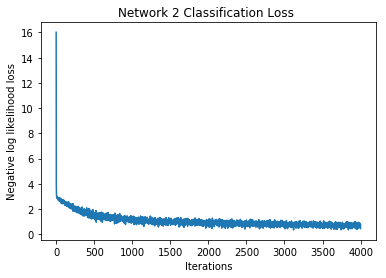

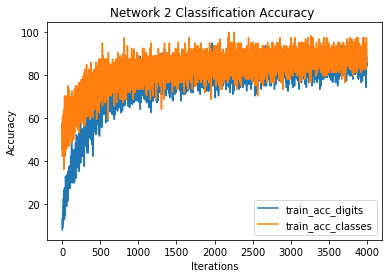

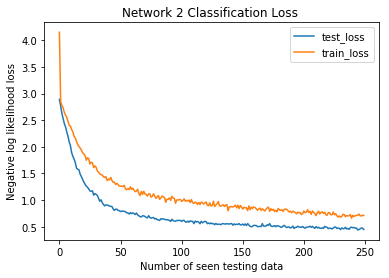

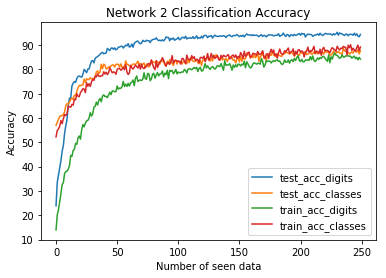

*************************** Start of the Network 1 ***************************

 The number of parameters of the network is 
  69928
Epoch [2/25],Step [1/64],Loss: 3.1007 ,Acc_labels: 35/64 (55%)
Epoch [2/25],Step [2/64],Loss: 47.7944 ,Acc_labels: 42/64 (66%)
Epoch [2/25],Step [3/64],Loss: 0.8015 ,Acc_labels: 30/64 (47%)
Epoch [2/25],Step [4/64],Loss: 0.7339 ,Acc_labels: 29/64 (45%)
Epoch [2/25],Step [5/64],Loss: 0.6878 ,Acc_labels: 31/64 (48%)
Epoch [2/25],Step [6/64],Loss: 0.6830 ,Acc_labels: 38/64 (59%)
Epoch [2/25],Step [7/64],Loss: 0.6964 ,Acc_labels: 34/64 (53%)
Epoch [2/25],Step [8/64],Loss: 0.6734 ,Acc_labels: 39/64 (61%)
Epoch [2/25],Step [9/64],Loss: 0.6739 ,Acc_labels: 35/64 (55%)
Epoch [2/25],Step [10/64],Loss: 0.7002 ,Acc_labels: 35/64 (55%)
Epoch [2/25],Step [11/64],Loss: 0.7176 ,Acc_labels: 34/64 (53%)
Epoch [2/25],Step [12/64],Loss: 0.6641 ,Acc_labels: 38/64 (59%)
Epoch [2/25],Step [13/64],Loss: 0.6602 ,Acc_labels: 39/64 (61%)
Epoch [2/25],Step [14/64],Loss: 0.6425 ,Acc

Epoch [9/25],Step [7/64],Loss: 0.4840 ,Acc_labels: 46/64 (72%)
Epoch [9/25],Step [8/64],Loss: 0.4931 ,Acc_labels: 48/64 (75%)
Epoch [9/25],Step [9/64],Loss: 0.4424 ,Acc_labels: 50/64 (78%)
Epoch [9/25],Step [10/64],Loss: 0.4467 ,Acc_labels: 49/64 (77%)
Epoch [9/25],Step [11/64],Loss: 0.4659 ,Acc_labels: 50/64 (78%)
Epoch [9/25],Step [12/64],Loss: 0.3243 ,Acc_labels: 59/64 (92%)
Epoch [9/25],Step [13/64],Loss: 0.4101 ,Acc_labels: 52/64 (81%)
Epoch [9/25],Step [14/64],Loss: 0.5235 ,Acc_labels: 50/64 (78%)
Epoch [9/25],Step [15/64],Loss: 0.3954 ,Acc_labels: 54/64 (84%)
Epoch [9/25],Step [16/40],Loss: 0.3615 ,Acc_labels: 34/40 (85%)

 Time needed to train  0.419320919085294

Test set: Loss: 0.4987,Acc_labels: 759/1000 76%
Epoch [10/25],Step [1/64],Loss: 0.4309 ,Acc_labels: 49/64 (77%)
Epoch [10/25],Step [2/64],Loss: 0.4537 ,Acc_labels: 49/64 (77%)
Epoch [10/25],Step [3/64],Loss: 0.4675 ,Acc_labels: 46/64 (72%)
Epoch [10/25],Step [4/64],Loss: 0.4639 ,Acc_labels: 49/64 (77%)
Epoch [10/25],St

Epoch [16/25],Step [13/64],Loss: 0.2348 ,Acc_labels: 58/64 (91%)
Epoch [16/25],Step [14/64],Loss: 0.2367 ,Acc_labels: 59/64 (92%)
Epoch [16/25],Step [15/64],Loss: 0.2128 ,Acc_labels: 59/64 (92%)
Epoch [16/25],Step [16/40],Loss: 0.1507 ,Acc_labels: 39/40 (98%)

 Time needed to train  0.5516691609518602

Test set: Loss: 0.4934,Acc_labels: 776/1000 78%
Epoch [17/25],Step [1/64],Loss: 0.2012 ,Acc_labels: 59/64 (92%)
Epoch [17/25],Step [2/64],Loss: 0.2225 ,Acc_labels: 56/64 (88%)
Epoch [17/25],Step [3/64],Loss: 0.1716 ,Acc_labels: 59/64 (92%)
Epoch [17/25],Step [4/64],Loss: 0.2370 ,Acc_labels: 57/64 (89%)
Epoch [17/25],Step [5/64],Loss: 0.2136 ,Acc_labels: 57/64 (89%)
Epoch [17/25],Step [6/64],Loss: 0.3127 ,Acc_labels: 58/64 (91%)
Epoch [17/25],Step [7/64],Loss: 0.1867 ,Acc_labels: 58/64 (91%)
Epoch [17/25],Step [8/64],Loss: 0.1937 ,Acc_labels: 59/64 (92%)
Epoch [17/25],Step [9/64],Loss: 0.2457 ,Acc_labels: 53/64 (83%)
Epoch [17/25],Step [10/64],Loss: 0.2075 ,Acc_labels: 58/64 (91%)
Epoch [

Epoch [24/25],Step [9/64],Loss: 0.0802 ,Acc_labels: 62/64 (97%)
Epoch [24/25],Step [10/64],Loss: 0.1390 ,Acc_labels: 61/64 (95%)
Epoch [24/25],Step [11/64],Loss: 0.0904 ,Acc_labels: 61/64 (95%)
Epoch [24/25],Step [12/64],Loss: 0.1218 ,Acc_labels: 60/64 (94%)
Epoch [24/25],Step [13/64],Loss: 0.0870 ,Acc_labels: 61/64 (95%)
Epoch [24/25],Step [14/64],Loss: 0.1568 ,Acc_labels: 60/64 (94%)
Epoch [24/25],Step [15/64],Loss: 0.1036 ,Acc_labels: 62/64 (97%)
Epoch [24/25],Step [16/40],Loss: 0.0235 ,Acc_labels: 40/40 (100%)

 Time needed to train  0.37678000004962087

Test set: Loss: 0.7403,Acc_labels: 773/1000 77%
Epoch [25/25],Step [1/64],Loss: 0.2264 ,Acc_labels: 61/64 (95%)
Epoch [25/25],Step [2/64],Loss: 0.0853 ,Acc_labels: 63/64 (98%)
Epoch [25/25],Step [3/64],Loss: 0.0781 ,Acc_labels: 63/64 (98%)
Epoch [25/25],Step [4/64],Loss: 0.1485 ,Acc_labels: 62/64 (97%)
Epoch [25/25],Step [5/64],Loss: 0.1835 ,Acc_labels: 60/64 (94%)
Epoch [25/25],Step [6/64],Loss: 0.1793 ,Acc_labels: 61/64 (95%)
Epo


Test set: Loss: 0.7205,Acc_labels: 787/1000 79%
Epoch [7/25],Step [1/64],Loss: 0.0614 ,Acc_labels: 64/64 (100%)
Epoch [7/25],Step [2/64],Loss: 0.0685 ,Acc_labels: 62/64 (97%)
Epoch [7/25],Step [3/64],Loss: 0.0546 ,Acc_labels: 62/64 (97%)
Epoch [7/25],Step [4/64],Loss: 0.0545 ,Acc_labels: 62/64 (97%)
Epoch [7/25],Step [5/64],Loss: 0.0624 ,Acc_labels: 62/64 (97%)
Epoch [7/25],Step [6/64],Loss: 0.0822 ,Acc_labels: 62/64 (97%)
Epoch [7/25],Step [7/64],Loss: 0.0173 ,Acc_labels: 64/64 (100%)
Epoch [7/25],Step [8/64],Loss: 0.0628 ,Acc_labels: 62/64 (97%)
Epoch [7/25],Step [9/64],Loss: 0.1142 ,Acc_labels: 61/64 (95%)
Epoch [7/25],Step [10/64],Loss: 0.0511 ,Acc_labels: 63/64 (98%)
Epoch [7/25],Step [11/64],Loss: 0.1158 ,Acc_labels: 61/64 (95%)
Epoch [7/25],Step [12/64],Loss: 0.0593 ,Acc_labels: 63/64 (98%)
Epoch [7/25],Step [13/64],Loss: 0.0348 ,Acc_labels: 64/64 (100%)
Epoch [7/25],Step [14/64],Loss: 0.0467 ,Acc_labels: 63/64 (98%)
Epoch [7/25],Step [15/64],Loss: 0.1444 ,Acc_labels: 63/64 (98

Epoch [14/25],Step [9/64],Loss: 0.0183 ,Acc_labels: 64/64 (100%)
Epoch [14/25],Step [10/64],Loss: 0.0525 ,Acc_labels: 63/64 (98%)
Epoch [14/25],Step [11/64],Loss: 0.0214 ,Acc_labels: 64/64 (100%)
Epoch [14/25],Step [12/64],Loss: 0.0130 ,Acc_labels: 64/64 (100%)
Epoch [14/25],Step [13/64],Loss: 0.0548 ,Acc_labels: 63/64 (98%)
Epoch [14/25],Step [14/64],Loss: 0.0149 ,Acc_labels: 64/64 (100%)
Epoch [14/25],Step [15/64],Loss: 0.0188 ,Acc_labels: 64/64 (100%)
Epoch [14/25],Step [16/40],Loss: 0.0266 ,Acc_labels: 40/40 (100%)

 Time needed to train  0.38374444690998644

Test set: Loss: 0.8458,Acc_labels: 810/1000 81%
Epoch [15/25],Step [1/64],Loss: 0.0320 ,Acc_labels: 63/64 (98%)
Epoch [15/25],Step [2/64],Loss: 0.0154 ,Acc_labels: 64/64 (100%)
Epoch [15/25],Step [3/64],Loss: 0.0065 ,Acc_labels: 64/64 (100%)
Epoch [15/25],Step [4/64],Loss: 0.0372 ,Acc_labels: 64/64 (100%)
Epoch [15/25],Step [5/64],Loss: 0.0608 ,Acc_labels: 63/64 (98%)
Epoch [15/25],Step [6/64],Loss: 0.0120 ,Acc_labels: 64/64 (


Test set: Loss: 0.9346,Acc_labels: 782/1000 78%
Epoch [22/25],Step [1/64],Loss: 0.0787 ,Acc_labels: 62/64 (97%)
Epoch [22/25],Step [2/64],Loss: 0.0070 ,Acc_labels: 64/64 (100%)
Epoch [22/25],Step [3/64],Loss: 0.0123 ,Acc_labels: 64/64 (100%)
Epoch [22/25],Step [4/64],Loss: 0.0245 ,Acc_labels: 63/64 (98%)
Epoch [22/25],Step [5/64],Loss: 0.0194 ,Acc_labels: 64/64 (100%)
Epoch [22/25],Step [6/64],Loss: 0.0469 ,Acc_labels: 63/64 (98%)
Epoch [22/25],Step [7/64],Loss: 0.0468 ,Acc_labels: 62/64 (97%)
Epoch [22/25],Step [8/64],Loss: 0.0099 ,Acc_labels: 64/64 (100%)
Epoch [22/25],Step [9/64],Loss: 0.0346 ,Acc_labels: 63/64 (98%)
Epoch [22/25],Step [10/64],Loss: 0.0098 ,Acc_labels: 64/64 (100%)
Epoch [22/25],Step [11/64],Loss: 0.0152 ,Acc_labels: 64/64 (100%)
Epoch [22/25],Step [12/64],Loss: 0.0170 ,Acc_labels: 63/64 (98%)
Epoch [22/25],Step [13/64],Loss: 0.1330 ,Acc_labels: 61/64 (95%)
Epoch [22/25],Step [14/64],Loss: 0.0376 ,Acc_labels: 63/64 (98%)
Epoch [22/25],Step [15/64],Loss: 0.0189 ,Acc

Epoch [4/25],Step [9/64],Loss: 0.0028 ,Acc_labels: 64/64 (100%)
Epoch [4/25],Step [10/64],Loss: 0.0554 ,Acc_labels: 63/64 (98%)
Epoch [4/25],Step [11/64],Loss: 0.0146 ,Acc_labels: 64/64 (100%)
Epoch [4/25],Step [12/64],Loss: 0.0096 ,Acc_labels: 64/64 (100%)
Epoch [4/25],Step [13/64],Loss: 0.0043 ,Acc_labels: 64/64 (100%)
Epoch [4/25],Step [14/64],Loss: 0.0134 ,Acc_labels: 64/64 (100%)
Epoch [4/25],Step [15/64],Loss: 0.0183 ,Acc_labels: 64/64 (100%)
Epoch [4/25],Step [16/40],Loss: 0.0013 ,Acc_labels: 40/40 (100%)

 Time needed to train  0.3675669670337811

Test set: Loss: 0.9678,Acc_labels: 802/1000 80%
Epoch [5/25],Step [1/64],Loss: 0.0136 ,Acc_labels: 64/64 (100%)
Epoch [5/25],Step [2/64],Loss: 0.0043 ,Acc_labels: 64/64 (100%)
Epoch [5/25],Step [3/64],Loss: 0.0010 ,Acc_labels: 64/64 (100%)
Epoch [5/25],Step [4/64],Loss: 0.0318 ,Acc_labels: 63/64 (98%)
Epoch [5/25],Step [5/64],Loss: 0.0093 ,Acc_labels: 64/64 (100%)
Epoch [5/25],Step [6/64],Loss: 0.0157 ,Acc_labels: 64/64 (100%)
Epoch [

Epoch [11/25],Step [16/40],Loss: 0.0021 ,Acc_labels: 40/40 (100%)

 Time needed to train  0.41232164890971035

Test set: Loss: 1.0711,Acc_labels: 811/1000 81%
Epoch [12/25],Step [1/64],Loss: 0.0474 ,Acc_labels: 63/64 (98%)
Epoch [12/25],Step [2/64],Loss: 0.1103 ,Acc_labels: 63/64 (98%)
Epoch [12/25],Step [3/64],Loss: 0.0306 ,Acc_labels: 63/64 (98%)
Epoch [12/25],Step [4/64],Loss: 0.0357 ,Acc_labels: 63/64 (98%)
Epoch [12/25],Step [5/64],Loss: 0.0081 ,Acc_labels: 64/64 (100%)
Epoch [12/25],Step [6/64],Loss: 0.0107 ,Acc_labels: 64/64 (100%)
Epoch [12/25],Step [7/64],Loss: 0.0024 ,Acc_labels: 64/64 (100%)
Epoch [12/25],Step [8/64],Loss: 0.0129 ,Acc_labels: 64/64 (100%)
Epoch [12/25],Step [9/64],Loss: 0.0007 ,Acc_labels: 64/64 (100%)
Epoch [12/25],Step [10/64],Loss: 0.0349 ,Acc_labels: 63/64 (98%)
Epoch [12/25],Step [11/64],Loss: 0.0187 ,Acc_labels: 64/64 (100%)
Epoch [12/25],Step [12/64],Loss: 0.0250 ,Acc_labels: 63/64 (98%)
Epoch [12/25],Step [13/64],Loss: 0.0621 ,Acc_labels: 62/64 (97%)

Epoch [19/25],Step [10/64],Loss: 0.0224 ,Acc_labels: 64/64 (100%)
Epoch [19/25],Step [11/64],Loss: 0.0175 ,Acc_labels: 64/64 (100%)
Epoch [19/25],Step [12/64],Loss: 0.0048 ,Acc_labels: 64/64 (100%)
Epoch [19/25],Step [13/64],Loss: 0.0183 ,Acc_labels: 64/64 (100%)
Epoch [19/25],Step [14/64],Loss: 0.0233 ,Acc_labels: 64/64 (100%)
Epoch [19/25],Step [15/64],Loss: 0.0247 ,Acc_labels: 63/64 (98%)
Epoch [19/25],Step [16/40],Loss: 0.0036 ,Acc_labels: 40/40 (100%)

 Time needed to train  0.3878503249725327

Test set: Loss: 0.9090,Acc_labels: 791/1000 79%
Epoch [20/25],Step [1/64],Loss: 0.0152 ,Acc_labels: 64/64 (100%)
Epoch [20/25],Step [2/64],Loss: 0.0380 ,Acc_labels: 63/64 (98%)
Epoch [20/25],Step [3/64],Loss: 0.0024 ,Acc_labels: 64/64 (100%)
Epoch [20/25],Step [4/64],Loss: 0.0138 ,Acc_labels: 64/64 (100%)
Epoch [20/25],Step [5/64],Loss: 0.0059 ,Acc_labels: 64/64 (100%)
Epoch [20/25],Step [6/64],Loss: 0.0019 ,Acc_labels: 64/64 (100%)
Epoch [20/25],Step [7/64],Loss: 0.0069 ,Acc_labels: 64/64 


Test set: Loss: 0.9564,Acc_labels: 808/1000 81%
Epoch [2/25],Step [1/64],Loss: 0.0058 ,Acc_labels: 64/64 (100%)
Epoch [2/25],Step [2/64],Loss: 0.0174 ,Acc_labels: 63/64 (98%)
Epoch [2/25],Step [3/64],Loss: 0.0006 ,Acc_labels: 64/64 (100%)
Epoch [2/25],Step [4/64],Loss: 0.0055 ,Acc_labels: 64/64 (100%)
Epoch [2/25],Step [5/64],Loss: 0.0291 ,Acc_labels: 63/64 (98%)
Epoch [2/25],Step [6/64],Loss: 0.0077 ,Acc_labels: 64/64 (100%)
Epoch [2/25],Step [7/64],Loss: 0.0052 ,Acc_labels: 64/64 (100%)
Epoch [2/25],Step [8/64],Loss: 0.0031 ,Acc_labels: 64/64 (100%)
Epoch [2/25],Step [9/64],Loss: 0.0006 ,Acc_labels: 64/64 (100%)
Epoch [2/25],Step [10/64],Loss: 0.0050 ,Acc_labels: 64/64 (100%)
Epoch [2/25],Step [11/64],Loss: 0.0043 ,Acc_labels: 64/64 (100%)
Epoch [2/25],Step [12/64],Loss: 0.0012 ,Acc_labels: 64/64 (100%)
Epoch [2/25],Step [13/64],Loss: 0.0012 ,Acc_labels: 64/64 (100%)
Epoch [2/25],Step [14/64],Loss: 0.0076 ,Acc_labels: 64/64 (100%)
Epoch [2/25],Step [15/64],Loss: 0.0008 ,Acc_labels: 

Epoch [9/25],Step [9/64],Loss: 0.0882 ,Acc_labels: 62/64 (97%)
Epoch [9/25],Step [10/64],Loss: 0.0037 ,Acc_labels: 64/64 (100%)
Epoch [9/25],Step [11/64],Loss: 0.0018 ,Acc_labels: 64/64 (100%)
Epoch [9/25],Step [12/64],Loss: 0.0015 ,Acc_labels: 64/64 (100%)
Epoch [9/25],Step [13/64],Loss: 0.0063 ,Acc_labels: 64/64 (100%)
Epoch [9/25],Step [14/64],Loss: 0.0070 ,Acc_labels: 64/64 (100%)
Epoch [9/25],Step [15/64],Loss: 0.0008 ,Acc_labels: 64/64 (100%)
Epoch [9/25],Step [16/40],Loss: 0.0009 ,Acc_labels: 40/40 (100%)

 Time needed to train  0.3729316920507699

Test set: Loss: 1.1067,Acc_labels: 792/1000 79%
Epoch [10/25],Step [1/64],Loss: 0.0075 ,Acc_labels: 64/64 (100%)
Epoch [10/25],Step [2/64],Loss: 0.0100 ,Acc_labels: 64/64 (100%)
Epoch [10/25],Step [3/64],Loss: 0.0468 ,Acc_labels: 63/64 (98%)
Epoch [10/25],Step [4/64],Loss: 0.0042 ,Acc_labels: 64/64 (100%)
Epoch [10/25],Step [5/64],Loss: 0.0043 ,Acc_labels: 64/64 (100%)
Epoch [10/25],Step [6/64],Loss: 0.0020 ,Acc_labels: 64/64 (100%)
E


Test set: Loss: 1.0041,Acc_labels: 801/1000 80%
Epoch [17/25],Step [1/64],Loss: 0.0089 ,Acc_labels: 64/64 (100%)
Epoch [17/25],Step [2/64],Loss: 0.0231 ,Acc_labels: 63/64 (98%)
Epoch [17/25],Step [3/64],Loss: 0.0155 ,Acc_labels: 63/64 (98%)
Epoch [17/25],Step [4/64],Loss: 0.0129 ,Acc_labels: 64/64 (100%)
Epoch [17/25],Step [5/64],Loss: 0.0002 ,Acc_labels: 64/64 (100%)
Epoch [17/25],Step [6/64],Loss: 0.0100 ,Acc_labels: 64/64 (100%)
Epoch [17/25],Step [7/64],Loss: 0.0077 ,Acc_labels: 64/64 (100%)
Epoch [17/25],Step [8/64],Loss: 0.0048 ,Acc_labels: 64/64 (100%)
Epoch [17/25],Step [9/64],Loss: 0.0062 ,Acc_labels: 64/64 (100%)
Epoch [17/25],Step [10/64],Loss: 0.0046 ,Acc_labels: 64/64 (100%)
Epoch [17/25],Step [11/64],Loss: 0.0024 ,Acc_labels: 64/64 (100%)
Epoch [17/25],Step [12/64],Loss: 0.0006 ,Acc_labels: 64/64 (100%)
Epoch [17/25],Step [13/64],Loss: 0.0058 ,Acc_labels: 64/64 (100%)
Epoch [17/25],Step [14/64],Loss: 0.0015 ,Acc_labels: 64/64 (100%)
Epoch [17/25],Step [15/64],Loss: 0.002

Epoch [24/25],Step [8/64],Loss: 0.0011 ,Acc_labels: 64/64 (100%)
Epoch [24/25],Step [9/64],Loss: 0.0131 ,Acc_labels: 64/64 (100%)
Epoch [24/25],Step [10/64],Loss: 0.0068 ,Acc_labels: 64/64 (100%)
Epoch [24/25],Step [11/64],Loss: 0.0094 ,Acc_labels: 64/64 (100%)
Epoch [24/25],Step [12/64],Loss: 0.0108 ,Acc_labels: 64/64 (100%)
Epoch [24/25],Step [13/64],Loss: 0.0019 ,Acc_labels: 64/64 (100%)
Epoch [24/25],Step [14/64],Loss: 0.0010 ,Acc_labels: 64/64 (100%)
Epoch [24/25],Step [15/64],Loss: 0.0053 ,Acc_labels: 64/64 (100%)
Epoch [24/25],Step [16/40],Loss: 0.0015 ,Acc_labels: 40/40 (100%)

 Time needed to train  0.423376232967712

Test set: Loss: 0.9392,Acc_labels: 807/1000 81%
Epoch [25/25],Step [1/64],Loss: 0.0028 ,Acc_labels: 64/64 (100%)
Epoch [25/25],Step [2/64],Loss: 0.0065 ,Acc_labels: 64/64 (100%)
Epoch [25/25],Step [3/64],Loss: 0.0035 ,Acc_labels: 64/64 (100%)
Epoch [25/25],Step [4/64],Loss: 0.0195 ,Acc_labels: 64/64 (100%)
Epoch [25/25],Step [5/64],Loss: 0.0131 ,Acc_labels: 64/64


Test set: Loss: 1.0158,Acc_labels: 806/1000 81%
Epoch [7/25],Step [1/64],Loss: 0.0057 ,Acc_labels: 64/64 (100%)
Epoch [7/25],Step [2/64],Loss: 0.0015 ,Acc_labels: 64/64 (100%)
Epoch [7/25],Step [3/64],Loss: 0.0006 ,Acc_labels: 64/64 (100%)
Epoch [7/25],Step [4/64],Loss: 0.0080 ,Acc_labels: 64/64 (100%)
Epoch [7/25],Step [5/64],Loss: 0.0029 ,Acc_labels: 64/64 (100%)
Epoch [7/25],Step [6/64],Loss: 0.0290 ,Acc_labels: 63/64 (98%)
Epoch [7/25],Step [7/64],Loss: 0.0018 ,Acc_labels: 64/64 (100%)
Epoch [7/25],Step [8/64],Loss: 0.0019 ,Acc_labels: 64/64 (100%)
Epoch [7/25],Step [9/64],Loss: 0.0160 ,Acc_labels: 63/64 (98%)
Epoch [7/25],Step [10/64],Loss: 0.0055 ,Acc_labels: 64/64 (100%)
Epoch [7/25],Step [11/64],Loss: 0.0017 ,Acc_labels: 64/64 (100%)
Epoch [7/25],Step [12/64],Loss: 0.1074 ,Acc_labels: 63/64 (98%)
Epoch [7/25],Step [13/64],Loss: 0.0071 ,Acc_labels: 64/64 (100%)
Epoch [7/25],Step [14/64],Loss: 0.0054 ,Acc_labels: 64/64 (100%)
Epoch [7/25],Step [15/64],Loss: 0.0075 ,Acc_labels: 6

Epoch [14/25],Step [8/64],Loss: 0.0014 ,Acc_labels: 64/64 (100%)
Epoch [14/25],Step [9/64],Loss: 0.0041 ,Acc_labels: 64/64 (100%)
Epoch [14/25],Step [10/64],Loss: 0.0468 ,Acc_labels: 63/64 (98%)
Epoch [14/25],Step [11/64],Loss: 0.0504 ,Acc_labels: 62/64 (97%)
Epoch [14/25],Step [12/64],Loss: 0.0006 ,Acc_labels: 64/64 (100%)
Epoch [14/25],Step [13/64],Loss: 0.0144 ,Acc_labels: 64/64 (100%)
Epoch [14/25],Step [14/64],Loss: 0.0039 ,Acc_labels: 64/64 (100%)
Epoch [14/25],Step [15/64],Loss: 0.0500 ,Acc_labels: 63/64 (98%)
Epoch [14/25],Step [16/40],Loss: 0.0021 ,Acc_labels: 40/40 (100%)

 Time needed to train  0.4386784170055762

Test set: Loss: 1.0997,Acc_labels: 804/1000 80%
Epoch [15/25],Step [1/64],Loss: 0.0025 ,Acc_labels: 64/64 (100%)
Epoch [15/25],Step [2/64],Loss: 0.0013 ,Acc_labels: 64/64 (100%)
Epoch [15/25],Step [3/64],Loss: 0.0038 ,Acc_labels: 64/64 (100%)
Epoch [15/25],Step [4/64],Loss: 0.0095 ,Acc_labels: 64/64 (100%)
Epoch [15/25],Step [5/64],Loss: 0.0031 ,Acc_labels: 64/64 (


Test set: Loss: 1.0976,Acc_labels: 806/1000 81%
Epoch [22/25],Step [1/64],Loss: 0.0006 ,Acc_labels: 64/64 (100%)
Epoch [22/25],Step [2/64],Loss: 0.0087 ,Acc_labels: 64/64 (100%)
Epoch [22/25],Step [3/64],Loss: 0.0006 ,Acc_labels: 64/64 (100%)
Epoch [22/25],Step [4/64],Loss: 0.0026 ,Acc_labels: 64/64 (100%)
Epoch [22/25],Step [5/64],Loss: 0.0011 ,Acc_labels: 64/64 (100%)
Epoch [22/25],Step [6/64],Loss: 0.0005 ,Acc_labels: 64/64 (100%)
Epoch [22/25],Step [7/64],Loss: 0.0125 ,Acc_labels: 64/64 (100%)
Epoch [22/25],Step [8/64],Loss: 0.0046 ,Acc_labels: 64/64 (100%)
Epoch [22/25],Step [9/64],Loss: 0.0028 ,Acc_labels: 64/64 (100%)
Epoch [22/25],Step [10/64],Loss: 0.0017 ,Acc_labels: 64/64 (100%)
Epoch [22/25],Step [11/64],Loss: 0.0032 ,Acc_labels: 64/64 (100%)
Epoch [22/25],Step [12/64],Loss: 0.0041 ,Acc_labels: 64/64 (100%)
Epoch [22/25],Step [13/64],Loss: 0.0895 ,Acc_labels: 62/64 (97%)
Epoch [22/25],Step [14/64],Loss: 0.0009 ,Acc_labels: 64/64 (100%)
Epoch [22/25],Step [15/64],Loss: 0.00

Epoch [4/25],Step [9/64],Loss: 0.0007 ,Acc_labels: 64/64 (100%)
Epoch [4/25],Step [10/64],Loss: 0.0007 ,Acc_labels: 64/64 (100%)
Epoch [4/25],Step [11/64],Loss: 0.0008 ,Acc_labels: 64/64 (100%)
Epoch [4/25],Step [12/64],Loss: 0.0017 ,Acc_labels: 64/64 (100%)
Epoch [4/25],Step [13/64],Loss: 0.0006 ,Acc_labels: 64/64 (100%)
Epoch [4/25],Step [14/64],Loss: 0.0048 ,Acc_labels: 64/64 (100%)
Epoch [4/25],Step [15/64],Loss: 0.0008 ,Acc_labels: 64/64 (100%)
Epoch [4/25],Step [16/40],Loss: 0.0001 ,Acc_labels: 40/40 (100%)

 Time needed to train  0.37133619596716017

Test set: Loss: 1.0850,Acc_labels: 805/1000 80%
Epoch [5/25],Step [1/64],Loss: 0.0002 ,Acc_labels: 64/64 (100%)
Epoch [5/25],Step [2/64],Loss: 0.0008 ,Acc_labels: 64/64 (100%)
Epoch [5/25],Step [3/64],Loss: 0.0013 ,Acc_labels: 64/64 (100%)
Epoch [5/25],Step [4/64],Loss: 0.0318 ,Acc_labels: 63/64 (98%)
Epoch [5/25],Step [5/64],Loss: 0.0120 ,Acc_labels: 64/64 (100%)
Epoch [5/25],Step [6/64],Loss: 0.0039 ,Acc_labels: 64/64 (100%)
Epoch


Test set: Loss: 1.0273,Acc_labels: 808/1000 81%
Epoch [12/25],Step [1/64],Loss: 0.0003 ,Acc_labels: 64/64 (100%)
Epoch [12/25],Step [2/64],Loss: 0.0004 ,Acc_labels: 64/64 (100%)
Epoch [12/25],Step [3/64],Loss: 0.0082 ,Acc_labels: 64/64 (100%)
Epoch [12/25],Step [4/64],Loss: 0.0005 ,Acc_labels: 64/64 (100%)
Epoch [12/25],Step [5/64],Loss: 0.0011 ,Acc_labels: 64/64 (100%)
Epoch [12/25],Step [6/64],Loss: 0.0005 ,Acc_labels: 64/64 (100%)
Epoch [12/25],Step [7/64],Loss: 0.0001 ,Acc_labels: 64/64 (100%)
Epoch [12/25],Step [8/64],Loss: 0.0043 ,Acc_labels: 64/64 (100%)
Epoch [12/25],Step [9/64],Loss: 0.0014 ,Acc_labels: 64/64 (100%)
Epoch [12/25],Step [10/64],Loss: 0.0028 ,Acc_labels: 64/64 (100%)
Epoch [12/25],Step [11/64],Loss: 0.0004 ,Acc_labels: 64/64 (100%)
Epoch [12/25],Step [12/64],Loss: 0.0020 ,Acc_labels: 64/64 (100%)
Epoch [12/25],Step [13/64],Loss: 0.0101 ,Acc_labels: 64/64 (100%)
Epoch [12/25],Step [14/64],Loss: 0.0008 ,Acc_labels: 64/64 (100%)
Epoch [12/25],Step [15/64],Loss: 0.0

Epoch [19/25],Step [9/64],Loss: 0.0017 ,Acc_labels: 64/64 (100%)
Epoch [19/25],Step [10/64],Loss: 0.0088 ,Acc_labels: 64/64 (100%)
Epoch [19/25],Step [11/64],Loss: 0.0107 ,Acc_labels: 64/64 (100%)
Epoch [19/25],Step [12/64],Loss: 0.0209 ,Acc_labels: 63/64 (98%)
Epoch [19/25],Step [13/64],Loss: 0.0030 ,Acc_labels: 64/64 (100%)
Epoch [19/25],Step [14/64],Loss: 0.0054 ,Acc_labels: 64/64 (100%)
Epoch [19/25],Step [15/64],Loss: 0.0648 ,Acc_labels: 63/64 (98%)
Epoch [19/25],Step [16/40],Loss: 0.0047 ,Acc_labels: 40/40 (100%)

 Time needed to train  0.3678567939205095

Test set: Loss: 1.0693,Acc_labels: 789/1000 79%
Epoch [20/25],Step [1/64],Loss: 0.0095 ,Acc_labels: 64/64 (100%)
Epoch [20/25],Step [2/64],Loss: 0.0214 ,Acc_labels: 64/64 (100%)
Epoch [20/25],Step [3/64],Loss: 0.0975 ,Acc_labels: 63/64 (98%)
Epoch [20/25],Step [4/64],Loss: 0.0016 ,Acc_labels: 64/64 (100%)
Epoch [20/25],Step [5/64],Loss: 0.0049 ,Acc_labels: 64/64 (100%)
Epoch [20/25],Step [6/64],Loss: 0.0012 ,Acc_labels: 64/64 (


Test set: Loss: 0.9992,Acc_labels: 811/1000 81%
Epoch [2/25],Step [1/64],Loss: 0.0007 ,Acc_labels: 64/64 (100%)
Epoch [2/25],Step [2/64],Loss: 0.0077 ,Acc_labels: 64/64 (100%)
Epoch [2/25],Step [3/64],Loss: 0.0060 ,Acc_labels: 64/64 (100%)
Epoch [2/25],Step [4/64],Loss: 0.0020 ,Acc_labels: 64/64 (100%)
Epoch [2/25],Step [5/64],Loss: 0.0077 ,Acc_labels: 64/64 (100%)
Epoch [2/25],Step [6/64],Loss: 0.0069 ,Acc_labels: 64/64 (100%)
Epoch [2/25],Step [7/64],Loss: 0.0313 ,Acc_labels: 63/64 (98%)
Epoch [2/25],Step [8/64],Loss: 0.0015 ,Acc_labels: 64/64 (100%)
Epoch [2/25],Step [9/64],Loss: 0.0002 ,Acc_labels: 64/64 (100%)
Epoch [2/25],Step [10/64],Loss: 0.0007 ,Acc_labels: 64/64 (100%)
Epoch [2/25],Step [11/64],Loss: 0.0006 ,Acc_labels: 64/64 (100%)
Epoch [2/25],Step [12/64],Loss: 0.0002 ,Acc_labels: 64/64 (100%)
Epoch [2/25],Step [13/64],Loss: 0.0011 ,Acc_labels: 64/64 (100%)
Epoch [2/25],Step [14/64],Loss: 0.0017 ,Acc_labels: 64/64 (100%)
Epoch [2/25],Step [15/64],Loss: 0.0011 ,Acc_labels:

Epoch [9/25],Step [9/64],Loss: 0.0048 ,Acc_labels: 64/64 (100%)
Epoch [9/25],Step [10/64],Loss: 0.0013 ,Acc_labels: 64/64 (100%)
Epoch [9/25],Step [11/64],Loss: 0.0009 ,Acc_labels: 64/64 (100%)
Epoch [9/25],Step [12/64],Loss: 0.0100 ,Acc_labels: 64/64 (100%)
Epoch [9/25],Step [13/64],Loss: 0.0015 ,Acc_labels: 64/64 (100%)
Epoch [9/25],Step [14/64],Loss: 0.0016 ,Acc_labels: 64/64 (100%)
Epoch [9/25],Step [15/64],Loss: 0.0002 ,Acc_labels: 64/64 (100%)
Epoch [9/25],Step [16/40],Loss: 0.0001 ,Acc_labels: 40/40 (100%)

 Time needed to train  0.40335763595066965

Test set: Loss: 1.1327,Acc_labels: 798/1000 80%
Epoch [10/25],Step [1/64],Loss: 0.0052 ,Acc_labels: 64/64 (100%)
Epoch [10/25],Step [2/64],Loss: 0.0002 ,Acc_labels: 64/64 (100%)
Epoch [10/25],Step [3/64],Loss: 0.0020 ,Acc_labels: 64/64 (100%)
Epoch [10/25],Step [4/64],Loss: 0.0039 ,Acc_labels: 64/64 (100%)
Epoch [10/25],Step [5/64],Loss: 0.0032 ,Acc_labels: 64/64 (100%)
Epoch [10/25],Step [6/64],Loss: 0.0110 ,Acc_labels: 64/64 (100%


Test set: Loss: 1.1711,Acc_labels: 816/1000 82%
Epoch [17/25],Step [1/64],Loss: 0.0004 ,Acc_labels: 64/64 (100%)
Epoch [17/25],Step [2/64],Loss: 0.0020 ,Acc_labels: 64/64 (100%)
Epoch [17/25],Step [3/64],Loss: 0.0142 ,Acc_labels: 63/64 (98%)
Epoch [17/25],Step [4/64],Loss: 0.0006 ,Acc_labels: 64/64 (100%)
Epoch [17/25],Step [5/64],Loss: 0.0077 ,Acc_labels: 64/64 (100%)
Epoch [17/25],Step [6/64],Loss: 0.0008 ,Acc_labels: 64/64 (100%)
Epoch [17/25],Step [7/64],Loss: 0.0048 ,Acc_labels: 64/64 (100%)
Epoch [17/25],Step [8/64],Loss: 0.0006 ,Acc_labels: 64/64 (100%)
Epoch [17/25],Step [9/64],Loss: 0.0122 ,Acc_labels: 63/64 (98%)
Epoch [17/25],Step [10/64],Loss: 0.0011 ,Acc_labels: 64/64 (100%)
Epoch [17/25],Step [11/64],Loss: 0.0081 ,Acc_labels: 64/64 (100%)
Epoch [17/25],Step [12/64],Loss: 0.0008 ,Acc_labels: 64/64 (100%)
Epoch [17/25],Step [13/64],Loss: 0.0019 ,Acc_labels: 64/64 (100%)
Epoch [17/25],Step [14/64],Loss: 0.0003 ,Acc_labels: 64/64 (100%)
Epoch [17/25],Step [15/64],Loss: 0.000

Epoch [24/25],Step [7/64],Loss: 0.0004 ,Acc_labels: 64/64 (100%)
Epoch [24/25],Step [8/64],Loss: 0.0084 ,Acc_labels: 64/64 (100%)
Epoch [24/25],Step [9/64],Loss: 0.0112 ,Acc_labels: 64/64 (100%)
Epoch [24/25],Step [10/64],Loss: 0.0036 ,Acc_labels: 64/64 (100%)
Epoch [24/25],Step [11/64],Loss: 0.0004 ,Acc_labels: 64/64 (100%)
Epoch [24/25],Step [12/64],Loss: 0.0106 ,Acc_labels: 64/64 (100%)
Epoch [24/25],Step [13/64],Loss: 0.0306 ,Acc_labels: 63/64 (98%)
Epoch [24/25],Step [14/64],Loss: 0.0089 ,Acc_labels: 64/64 (100%)
Epoch [24/25],Step [15/64],Loss: 0.0047 ,Acc_labels: 64/64 (100%)
Epoch [24/25],Step [16/40],Loss: 0.0080 ,Acc_labels: 40/40 (100%)

 Time needed to train  0.43616146908607334

Test set: Loss: 1.1800,Acc_labels: 799/1000 80%
Epoch [25/25],Step [1/64],Loss: 0.0009 ,Acc_labels: 64/64 (100%)
Epoch [25/25],Step [2/64],Loss: 0.0036 ,Acc_labels: 64/64 (100%)
Epoch [25/25],Step [3/64],Loss: 0.0009 ,Acc_labels: 64/64 (100%)
Epoch [25/25],Step [4/64],Loss: 0.0052 ,Acc_labels: 64/6

Epoch [6/25],Step [15/64],Loss: 0.0004 ,Acc_labels: 64/64 (100%)
Epoch [6/25],Step [16/40],Loss: 0.0001 ,Acc_labels: 40/40 (100%)

 Time needed to train  0.4279891879996285

Test set: Loss: 1.1668,Acc_labels: 809/1000 81%
Epoch [7/25],Step [1/64],Loss: 0.0030 ,Acc_labels: 64/64 (100%)
Epoch [7/25],Step [2/64],Loss: 0.0003 ,Acc_labels: 64/64 (100%)
Epoch [7/25],Step [3/64],Loss: 0.0006 ,Acc_labels: 64/64 (100%)
Epoch [7/25],Step [4/64],Loss: 0.0005 ,Acc_labels: 64/64 (100%)
Epoch [7/25],Step [5/64],Loss: 0.0001 ,Acc_labels: 64/64 (100%)
Epoch [7/25],Step [6/64],Loss: 0.0135 ,Acc_labels: 63/64 (98%)
Epoch [7/25],Step [7/64],Loss: 0.0001 ,Acc_labels: 64/64 (100%)
Epoch [7/25],Step [8/64],Loss: 0.0019 ,Acc_labels: 64/64 (100%)
Epoch [7/25],Step [9/64],Loss: 0.0002 ,Acc_labels: 64/64 (100%)
Epoch [7/25],Step [10/64],Loss: 0.0020 ,Acc_labels: 64/64 (100%)
Epoch [7/25],Step [11/64],Loss: 0.0040 ,Acc_labels: 64/64 (100%)
Epoch [7/25],Step [12/64],Loss: 0.0008 ,Acc_labels: 64/64 (100%)
Epoch [7

Epoch [14/25],Step [9/64],Loss: 0.0001 ,Acc_labels: 64/64 (100%)
Epoch [14/25],Step [10/64],Loss: 0.0011 ,Acc_labels: 64/64 (100%)
Epoch [14/25],Step [11/64],Loss: 0.0008 ,Acc_labels: 64/64 (100%)
Epoch [14/25],Step [12/64],Loss: 0.0003 ,Acc_labels: 64/64 (100%)
Epoch [14/25],Step [13/64],Loss: 0.0001 ,Acc_labels: 64/64 (100%)
Epoch [14/25],Step [14/64],Loss: 0.0001 ,Acc_labels: 64/64 (100%)
Epoch [14/25],Step [15/64],Loss: 0.0001 ,Acc_labels: 64/64 (100%)
Epoch [14/25],Step [16/40],Loss: 0.0001 ,Acc_labels: 40/40 (100%)

 Time needed to train  0.3904881359776482

Test set: Loss: 1.2345,Acc_labels: 811/1000 81%
Epoch [15/25],Step [1/64],Loss: 0.0042 ,Acc_labels: 64/64 (100%)
Epoch [15/25],Step [2/64],Loss: 0.0003 ,Acc_labels: 64/64 (100%)
Epoch [15/25],Step [3/64],Loss: 0.0001 ,Acc_labels: 64/64 (100%)
Epoch [15/25],Step [4/64],Loss: 0.0006 ,Acc_labels: 64/64 (100%)
Epoch [15/25],Step [5/64],Loss: 0.0059 ,Acc_labels: 64/64 (100%)
Epoch [15/25],Step [6/64],Loss: 0.0000 ,Acc_labels: 64/6


Test set: Loss: 1.2708,Acc_labels: 803/1000 80%
Epoch [22/25],Step [1/64],Loss: 0.0170 ,Acc_labels: 63/64 (98%)
Epoch [22/25],Step [2/64],Loss: 0.0014 ,Acc_labels: 64/64 (100%)
Epoch [22/25],Step [3/64],Loss: 0.0004 ,Acc_labels: 64/64 (100%)
Epoch [22/25],Step [4/64],Loss: 0.0015 ,Acc_labels: 64/64 (100%)
Epoch [22/25],Step [5/64],Loss: 0.0087 ,Acc_labels: 64/64 (100%)
Epoch [22/25],Step [6/64],Loss: 0.0003 ,Acc_labels: 64/64 (100%)
Epoch [22/25],Step [7/64],Loss: 0.0018 ,Acc_labels: 64/64 (100%)
Epoch [22/25],Step [8/64],Loss: 0.0025 ,Acc_labels: 64/64 (100%)
Epoch [22/25],Step [9/64],Loss: 0.0007 ,Acc_labels: 64/64 (100%)
Epoch [22/25],Step [10/64],Loss: 0.0047 ,Acc_labels: 64/64 (100%)
Epoch [22/25],Step [11/64],Loss: 0.0020 ,Acc_labels: 64/64 (100%)
Epoch [22/25],Step [12/64],Loss: 0.0033 ,Acc_labels: 64/64 (100%)
Epoch [22/25],Step [13/64],Loss: 0.0011 ,Acc_labels: 64/64 (100%)
Epoch [22/25],Step [14/64],Loss: 0.0004 ,Acc_labels: 64/64 (100%)
Epoch [22/25],Step [15/64],Loss: 0.00

Epoch [4/25],Step [9/64],Loss: 0.0002 ,Acc_labels: 64/64 (100%)
Epoch [4/25],Step [10/64],Loss: 0.0045 ,Acc_labels: 64/64 (100%)
Epoch [4/25],Step [11/64],Loss: 0.0016 ,Acc_labels: 64/64 (100%)
Epoch [4/25],Step [12/64],Loss: 0.0010 ,Acc_labels: 64/64 (100%)
Epoch [4/25],Step [13/64],Loss: 0.0004 ,Acc_labels: 64/64 (100%)
Epoch [4/25],Step [14/64],Loss: 0.0037 ,Acc_labels: 64/64 (100%)
Epoch [4/25],Step [15/64],Loss: 0.0006 ,Acc_labels: 64/64 (100%)
Epoch [4/25],Step [16/40],Loss: 0.0001 ,Acc_labels: 40/40 (100%)

 Time needed to train  0.3827363080345094

Test set: Loss: 1.2628,Acc_labels: 800/1000 80%
Epoch [5/25],Step [1/64],Loss: 0.0003 ,Acc_labels: 64/64 (100%)
Epoch [5/25],Step [2/64],Loss: 0.0003 ,Acc_labels: 64/64 (100%)
Epoch [5/25],Step [3/64],Loss: 0.0025 ,Acc_labels: 64/64 (100%)
Epoch [5/25],Step [4/64],Loss: 0.0005 ,Acc_labels: 64/64 (100%)
Epoch [5/25],Step [5/64],Loss: 0.0002 ,Acc_labels: 64/64 (100%)
Epoch [5/25],Step [6/64],Loss: 0.0002 ,Acc_labels: 64/64 (100%)
Epoch


Test set: Loss: 1.3510,Acc_labels: 800/1000 80%
Epoch [12/25],Step [1/64],Loss: 0.0002 ,Acc_labels: 64/64 (100%)
Epoch [12/25],Step [2/64],Loss: 0.0896 ,Acc_labels: 63/64 (98%)
Epoch [12/25],Step [3/64],Loss: 0.0030 ,Acc_labels: 64/64 (100%)
Epoch [12/25],Step [4/64],Loss: 0.0029 ,Acc_labels: 64/64 (100%)
Epoch [12/25],Step [5/64],Loss: 0.0349 ,Acc_labels: 63/64 (98%)
Epoch [12/25],Step [6/64],Loss: 0.0003 ,Acc_labels: 64/64 (100%)
Epoch [12/25],Step [7/64],Loss: 0.0003 ,Acc_labels: 64/64 (100%)
Epoch [12/25],Step [8/64],Loss: 0.0010 ,Acc_labels: 64/64 (100%)
Epoch [12/25],Step [9/64],Loss: 0.0017 ,Acc_labels: 64/64 (100%)
Epoch [12/25],Step [10/64],Loss: 0.0030 ,Acc_labels: 64/64 (100%)
Epoch [12/25],Step [11/64],Loss: 0.0006 ,Acc_labels: 64/64 (100%)
Epoch [12/25],Step [12/64],Loss: 0.0046 ,Acc_labels: 64/64 (100%)
Epoch [12/25],Step [13/64],Loss: 0.0002 ,Acc_labels: 64/64 (100%)
Epoch [12/25],Step [14/64],Loss: 0.0254 ,Acc_labels: 63/64 (98%)
Epoch [12/25],Step [15/64],Loss: 0.0009

Epoch [19/25],Step [9/64],Loss: 0.0035 ,Acc_labels: 64/64 (100%)
Epoch [19/25],Step [10/64],Loss: 0.0008 ,Acc_labels: 64/64 (100%)
Epoch [19/25],Step [11/64],Loss: 0.0010 ,Acc_labels: 64/64 (100%)
Epoch [19/25],Step [12/64],Loss: 0.0160 ,Acc_labels: 63/64 (98%)
Epoch [19/25],Step [13/64],Loss: 0.0003 ,Acc_labels: 64/64 (100%)
Epoch [19/25],Step [14/64],Loss: 0.0004 ,Acc_labels: 64/64 (100%)
Epoch [19/25],Step [15/64],Loss: 0.0008 ,Acc_labels: 64/64 (100%)
Epoch [19/25],Step [16/40],Loss: 0.0001 ,Acc_labels: 40/40 (100%)

 Time needed to train  0.3793593239970505

Test set: Loss: 1.1662,Acc_labels: 804/1000 80%
Epoch [20/25],Step [1/64],Loss: 0.0006 ,Acc_labels: 64/64 (100%)
Epoch [20/25],Step [2/64],Loss: 0.0025 ,Acc_labels: 64/64 (100%)
Epoch [20/25],Step [3/64],Loss: 0.0002 ,Acc_labels: 64/64 (100%)
Epoch [20/25],Step [4/64],Loss: 0.0022 ,Acc_labels: 64/64 (100%)
Epoch [20/25],Step [5/64],Loss: 0.0001 ,Acc_labels: 64/64 (100%)
Epoch [20/25],Step [6/64],Loss: 0.0004 ,Acc_labels: 64/64


Test set: Loss: 1.1823,Acc_labels: 801/1000 80%
Epoch [2/25],Step [1/64],Loss: 0.0001 ,Acc_labels: 64/64 (100%)
Epoch [2/25],Step [2/64],Loss: 0.0008 ,Acc_labels: 64/64 (100%)
Epoch [2/25],Step [3/64],Loss: 0.0012 ,Acc_labels: 64/64 (100%)
Epoch [2/25],Step [4/64],Loss: 0.0001 ,Acc_labels: 64/64 (100%)
Epoch [2/25],Step [5/64],Loss: 0.0273 ,Acc_labels: 63/64 (98%)
Epoch [2/25],Step [6/64],Loss: 0.0006 ,Acc_labels: 64/64 (100%)
Epoch [2/25],Step [7/64],Loss: 0.0008 ,Acc_labels: 64/64 (100%)
Epoch [2/25],Step [8/64],Loss: 0.0089 ,Acc_labels: 64/64 (100%)
Epoch [2/25],Step [9/64],Loss: 0.0003 ,Acc_labels: 64/64 (100%)
Epoch [2/25],Step [10/64],Loss: 0.0124 ,Acc_labels: 63/64 (98%)
Epoch [2/25],Step [11/64],Loss: 0.0003 ,Acc_labels: 64/64 (100%)
Epoch [2/25],Step [12/64],Loss: 0.0073 ,Acc_labels: 64/64 (100%)
Epoch [2/25],Step [13/64],Loss: 0.0082 ,Acc_labels: 64/64 (100%)
Epoch [2/25],Step [14/64],Loss: 0.0005 ,Acc_labels: 64/64 (100%)
Epoch [2/25],Step [15/64],Loss: 0.0119 ,Acc_labels: 

Epoch [9/25],Step [9/64],Loss: 0.0016 ,Acc_labels: 64/64 (100%)
Epoch [9/25],Step [10/64],Loss: 0.0041 ,Acc_labels: 64/64 (100%)
Epoch [9/25],Step [11/64],Loss: 0.0007 ,Acc_labels: 64/64 (100%)
Epoch [9/25],Step [12/64],Loss: 0.0002 ,Acc_labels: 64/64 (100%)
Epoch [9/25],Step [13/64],Loss: 0.0009 ,Acc_labels: 64/64 (100%)
Epoch [9/25],Step [14/64],Loss: 0.0001 ,Acc_labels: 64/64 (100%)
Epoch [9/25],Step [15/64],Loss: 0.0021 ,Acc_labels: 64/64 (100%)
Epoch [9/25],Step [16/40],Loss: 0.0007 ,Acc_labels: 40/40 (100%)

 Time needed to train  0.36621432402171195

Test set: Loss: 1.2341,Acc_labels: 816/1000 82%
Epoch [10/25],Step [1/64],Loss: 0.0001 ,Acc_labels: 64/64 (100%)
Epoch [10/25],Step [2/64],Loss: 0.0176 ,Acc_labels: 63/64 (98%)
Epoch [10/25],Step [3/64],Loss: 0.0004 ,Acc_labels: 64/64 (100%)
Epoch [10/25],Step [4/64],Loss: 0.0022 ,Acc_labels: 64/64 (100%)
Epoch [10/25],Step [5/64],Loss: 0.0005 ,Acc_labels: 64/64 (100%)
Epoch [10/25],Step [6/64],Loss: 0.0075 ,Acc_labels: 64/64 (100%)


Test set: Loss: 1.2618,Acc_labels: 806/1000 81%
Epoch [17/25],Step [1/64],Loss: 0.0001 ,Acc_labels: 64/64 (100%)
Epoch [17/25],Step [2/64],Loss: 0.0235 ,Acc_labels: 63/64 (98%)
Epoch [17/25],Step [3/64],Loss: 0.0009 ,Acc_labels: 64/64 (100%)
Epoch [17/25],Step [4/64],Loss: 0.0003 ,Acc_labels: 64/64 (100%)
Epoch [17/25],Step [5/64],Loss: 0.0001 ,Acc_labels: 64/64 (100%)
Epoch [17/25],Step [6/64],Loss: 0.0001 ,Acc_labels: 64/64 (100%)
Epoch [17/25],Step [7/64],Loss: 0.0002 ,Acc_labels: 64/64 (100%)
Epoch [17/25],Step [8/64],Loss: 0.0032 ,Acc_labels: 64/64 (100%)
Epoch [17/25],Step [9/64],Loss: 0.0003 ,Acc_labels: 64/64 (100%)
Epoch [17/25],Step [10/64],Loss: 0.0153 ,Acc_labels: 64/64 (100%)
Epoch [17/25],Step [11/64],Loss: 0.0007 ,Acc_labels: 64/64 (100%)
Epoch [17/25],Step [12/64],Loss: 0.0003 ,Acc_labels: 64/64 (100%)
Epoch [17/25],Step [13/64],Loss: 0.0002 ,Acc_labels: 64/64 (100%)
Epoch [17/25],Step [14/64],Loss: 0.0007 ,Acc_labels: 64/64 (100%)
Epoch [17/25],Step [15/64],Loss: 0.00

Epoch [24/25],Step [8/64],Loss: 0.0002 ,Acc_labels: 64/64 (100%)
Epoch [24/25],Step [9/64],Loss: 0.0011 ,Acc_labels: 64/64 (100%)
Epoch [24/25],Step [10/64],Loss: 0.0117 ,Acc_labels: 63/64 (98%)
Epoch [24/25],Step [11/64],Loss: 0.0021 ,Acc_labels: 64/64 (100%)
Epoch [24/25],Step [12/64],Loss: 0.0000 ,Acc_labels: 64/64 (100%)
Epoch [24/25],Step [13/64],Loss: 0.0014 ,Acc_labels: 64/64 (100%)
Epoch [24/25],Step [14/64],Loss: 0.0002 ,Acc_labels: 64/64 (100%)
Epoch [24/25],Step [15/64],Loss: 0.0046 ,Acc_labels: 64/64 (100%)
Epoch [24/25],Step [16/40],Loss: 0.0001 ,Acc_labels: 40/40 (100%)

 Time needed to train  0.43399255292024463

Test set: Loss: 1.1841,Acc_labels: 809/1000 81%
Epoch [25/25],Step [1/64],Loss: 0.0026 ,Acc_labels: 64/64 (100%)
Epoch [25/25],Step [2/64],Loss: 0.0473 ,Acc_labels: 63/64 (98%)
Epoch [25/25],Step [3/64],Loss: 0.0001 ,Acc_labels: 64/64 (100%)
Epoch [25/25],Step [4/64],Loss: 0.0008 ,Acc_labels: 64/64 (100%)
Epoch [25/25],Step [5/64],Loss: 0.0009 ,Acc_labels: 64/64

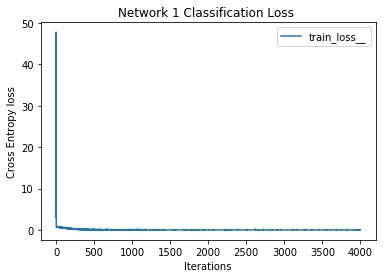

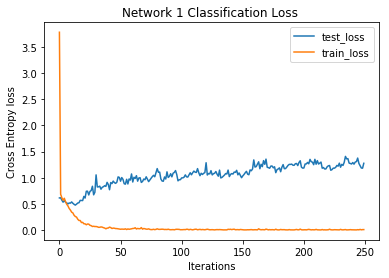

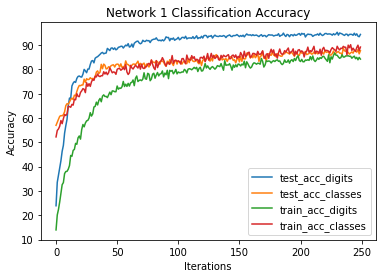

 
 ************************ Statistics of Network 2 ************************ 


 Average time needed for training:  0.23864598533604295

 Training:  
 Average accuracy of labels: 82.334140625 
 Median accuracy of labels: 84.375 
 Average accuracy on labels: 82.334140625 
 Maximum accuracy on labels: 100.0 
 Minimum accuracy on labels: 35.9375 
 Spread of accuracy on labels: 8.560299374912898 
 Average accuracy of digits: 75.7025390625 
 Median accuracy of digits: 79.6875 
 Average accuracy on digits: 75.7025390625 
 Maximum accuracy on digits: 95.0 
 Minimum accuracy on digits: 7.8125 
 Spread of accuracy on digits: 13.787749256444945

 Testing:  
 Average accuracy of labels: 82.4088 
 Median accuracy of labels: 83.8 
 Average accuracy on labels: 82.4088 
 Maximum accuracy on labels: 88.8 
 Minimum accuracy on labels: 57.0 
 Spread of accuracy on labels: 5.988637380129368 
 Average accuracy of digits: 89.4296 
 Median accuracy of digits: 93.475 
 Average accuracy on digits: 89.4296 
 M

In [15]:
import torch
import torchvision
import warnings
import torch.nn as nn
from PIL import Image
import statistics as st
from utils.utils import *
import torch.optim as optim
from torch.utils import data
import torch.nn.functional as F
from torch.autograd import Variable
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data.dataset import Dataset
from timeit import default_timer as timer
from nets.NN1 import NN1
from nets.NN2 import NN2
from nets.train_test import * 
from utils.MnistPairs import MnistPairs
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

#### Parameters ####
n_epochs = 25
iters = 10
batch_size_train = 64
batch_size_test = 1000
learning_rate = 0.01
momentum = 0.5
log_interval = 10
random_seed = 1
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)
#### Parameters ####

def main():
    """
    The function 
    - loads the train and test dataset according to given batchsizes 
    - trains and tests the first network
    - trains and tests the second network
    """
    #Loading dataset
    trans = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (1.0,))])
    
    train_dataset = MnistPairs('data/',train=True, transform=None)
    test_dataset = MnistPairs('data/',train=False, transform=None)
    

    train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                               batch_size=batch_size_train, 
                                               shuffle=False)

    test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                              batch_size=batch_size_test, 
                                              shuffle=False)
    
    print("\n Start of the Network 2 ")
    network2 = NN2()
    optimizer2 = optim.SGD(network2.parameters(), lr=learning_rate, momentum=momentum)
    
    print("The number of parameters of the network is ", count_parameters(network2))
    
    
    train_loss__ = []
    train_acc_digits__ = []
    train_acc_classes__ = []
    
    train_loss_ = []
    train_acc_digits_ = []
    train_acc_classes_= []

    test_loss__ = []
    test_acc_digits__ = []
    test_acc_classes__ = []
    avg_time2 = 0
    for i in range(iters):
        for epoch in range(1, n_epochs + 1):
            start = timer()
            train_loss, train_acc_digits, train_acc_classes  = train2(epoch, network2,train_loader,optimizer2) 
            end = timer()
            print("Time needed to train ", end - start)
            avg_time2 += end - start
            test_loss, test_acc_digits, test_acc_classes = test2(network2, test_loader)
            
            train_loss__ += train_loss
            train_acc_digits__ += train_acc_digits
            train_acc_classes__ += train_acc_classes
            
            train_loss_.append(mean(train_loss))
            train_acc_digits_.append(mean(train_acc_digits))
            train_acc_classes_.append(mean(train_acc_classes))
            
            test_loss__.append(test_loss)
            test_acc_digits__.append(test_acc_digits)
            test_acc_classes__.append(test_acc_classes)
            
    avg_time2 /=(iters * n_epochs)
    plt.figure()
    plt.plot(train_loss__, label = "train_loss__") 
    plt.ylabel("Negative log likelihood loss")
    plt.xlabel("Iterations")
    plt.title("Network 2 Classification Loss ")
    plt.show()
    
    plt.figure()
    plt.plot(train_acc_digits__, label = "train_acc_digits")
    plt.plot(train_acc_classes__, label = "train_acc_classes") 
    plt.legend()
    plt.ylabel("Accuracy")
    plt.xlabel("Iterations")
    plt.title("Network 2 Classification Accuracy ")
    plt.show()
    
    plt.figure()
    plt.plot(test_loss__, label = "test_loss") 
    plt.plot(train_loss_, label = "train_loss")
    plt.legend()
    plt.ylabel("Negative log likelihood loss")
    plt.xlabel("Number of seen testing data")
    plt.title("Network 2 Classification Loss ")
    plt.show()
    
    plt.figure()
    plt.plot(test_acc_digits__, label = "test_acc_digits")
    plt.plot(test_acc_classes__, label = "test_acc_classes")
    plt.plot(train_acc_digits_, label = "train_acc_digits")
    plt.plot(train_acc_classes_, label = "train_acc_classes")
    plt.legend()
    plt.ylabel("Accuracy")
    plt.xlabel("Number of seen data")
    plt.title("Network 2 Classification Accuracy")
    plt.show()
                      
    
    
    
   
    print("*************************** Start of the Network 1 ***************************")
    network1 = NN1()
    optimizer1 = optim.SGD(network1.parameters(), lr=learning_rate, momentum=momentum)
    
    train_loss__ = []
    train_acc__ = []
    
    train_loss_ = []
    train_acc_ = []

    test_loss__ = []
    test_acc__ = []
    avg_time1 = 0
    
    print("\n The number of parameters of the network is \n ", count_parameters(network1))
    for i in range(iters):
        t_loss = []
        t_acc = []
        test_loss_ = []
        test_acc_ = []
        for epoch in range(1, n_epochs + 1):
            start = timer()
            train_loss, train_acc  = train1(epoch, network1, train_loader, optimizer1) 
            end = timer()
            print("\n Time needed to train ", end - start)
            avg_time1 += end - start
            
            test_loss, test_acc = test1(network1, test_loader)
            
            train_loss__ += train_loss
            train_acc__ += train_acc_
            
            train_loss_.append(mean(train_loss))
            train_acc_.append(mean(train_acc))
            
            test_loss__.append(test_loss)
            test_acc__.append(test_acc)
            
    avg_time1 /= (iters * n_epochs)
    plt.figure()
    plt.plot(train_loss__, label = "train_loss__") 
    plt.ylabel("Cross Entropy loss")
    plt.legend()
    plt.xlabel("Iterations")
    plt.title("Network 1 Classification Loss ")
    plt.show()
    
    
    plt.figure()
    plt.plot(test_loss__, label = "test_loss") 
    plt.plot(train_loss_, label = "train_loss")
    plt.legend()
    plt.ylabel("Cross Entropy loss")
    plt.xlabel("Iterations")
    plt.title("Network 1 Classification Loss ")
    plt.show()
    
    plt.figure()
    plt.plot(test_acc_digits__, label = "test_acc_digits")
    plt.plot(test_acc_classes__, label = "test_acc_classes")
    plt.plot(train_acc_digits_, label = "train_acc_digits")
    plt.plot(train_acc_classes_, label = "train_acc_classes")
    plt.legend()
    plt.ylabel("Accuracy")
    plt.xlabel("Iterations")
    plt.title("Network 1 Classification Accuracy")
    plt.show()
    
    return avg_time2, train_acc_classes__, train_acc_digits__ , test_acc_classes__, test_acc_digits__, avg_time1, train_acc__, test_acc__
      
        
        
       
if __name__ == '__main__':
    avg_time2, train_acc_classes__, train_acc_digits__ , test_acc_classes__, test_acc_digits__, avg_time1, train_acc__, test_acc__ = main()
    print(" \n ************************ Statistics of Network 2 ************************ \n")
    print("\n Average time needed for training: ", avg_time2)
    print("\n Training: ","\n Average accuracy of labels: {}".format(st.mean(train_acc_classes__)),"\n Median accuracy of labels: {}".format(st.median(train_acc_classes__)),"\n Average accuracy on labels: {}".format(st.mean(train_acc_classes__)),"\n Maximum accuracy on labels: {}".format(max(train_acc_classes__)),"\n Minimum accuracy on labels: {}".format(min(train_acc_classes__)),"\n Spread of accuracy on labels: {}".format(st.stdev(train_acc_classes__)),"\n Average accuracy of digits: {}".format(st.mean(train_acc_digits__)),"\n Median accuracy of digits: {}".format(st.median(train_acc_digits__)),"\n Average accuracy on digits: {}".format(st.mean(train_acc_digits__)),"\n Maximum accuracy on digits: {}".format(max(train_acc_digits__)),"\n Minimum accuracy on digits: {}".format(min(train_acc_digits__)),"\n Spread of accuracy on digits: {}".format(st.stdev(train_acc_digits__)))
    print("\n Testing: ","\n Average accuracy of labels: {}".format(st.mean(test_acc_classes__)),"\n Median accuracy of labels: {}".format(st.median(test_acc_classes__)),"\n Average accuracy on labels: {}".format(st.mean(test_acc_classes__)),"\n Maximum accuracy on labels: {}".format(max(test_acc_classes__)),"\n Minimum accuracy on labels: {}".format(min(test_acc_classes__)),"\n Spread of accuracy on labels: {}".format(st.stdev(test_acc_classes__)),"\n Average accuracy of digits: {}".format(st.mean(test_acc_digits__)),"\n Median accuracy of digits: {}".format(st.median(test_acc_digits__)),"\n Average accuracy on digits: {}".format(st.mean(test_acc_digits__)),"\n Maximum accuracy on digits: {}".format(max(test_acc_digits__)),"\n Minimum accuracy on digits: {}".format(min(test_acc_digits__)),"\n Spread of accuracy on digits: {}".format(st.stdev(test_acc_digits__)))
    
    
    print("\n ************************ Statistics of Network 1 ************************ \n")
    print("\n Average time needed for training ", avg_time1)
    print("\n Training: ", "\n Average accuracy of labels: {}".format(st.mean(train_acc__)),"\n Median accuracy of labels: {}".format(st.median(train_acc__)),"\n Average accuracy on labels: {}".format(st.mean(train_acc__)),"\n Maximum accuracy on labels: {}".format(max(train_acc__)),"\n Minimum accuracy on labels: {}".format(min(train_acc__)),"\n Spread of accuracy on labels: {}".format(st.stdev(train_acc__)))
    print("\n Testing: ", "\n Average accuracy of labels: {}".format(st.mean(test_acc__)),"\n Median accuracy of labels: {}".format(st.median(test_acc__)), "\n Average accuracy on labels: {}".format(st.mean(test_acc__)),"\n Maximum accuracy on labels: {}".format(max(test_acc__)), "\n Minimum accuracy on labels: {}".format(min(test_acc__)), "\n Spread of accuracy on labels: {}".format(st.stdev(test_acc__)))
      
    